<a href="https://colab.research.google.com/github/i-kartikk/PRODIGY__ML__01/blob/main/Tas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Everyone!


Here in this notebook, I have tried to show the complete pipeline of a machine learning problem.
I've followed the following steps:
    1. Importng data and have the first look
    2. Exploratory Data Analysis
    3. Preparing the data for Feature Engineering
    4. Feature Engineering
    5. Model Building
    6. Parameter Tuning
    7. Predicting for the Test data
    8. Creating the submission file

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Loading the data
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# having a look
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Exploratory Data Analysis**

As I'm a complete begineer, I've used the methods and EDA techniques nicely explained by Krish Naik in his youtube channel. You can check out the videos here:


### 1. Checking for Missing Values

In [7]:
# Checking % of NAN values in the columns

features_with_na = [features for features in train.columns if train[features].isnull().sum()>0]

print("Features and its % of missing values: ")
print()
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4))

Features and its % of missing values: 

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.5973
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
Electrical 0.0007
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


#### Finding the relationship between the missing values and Sales Price

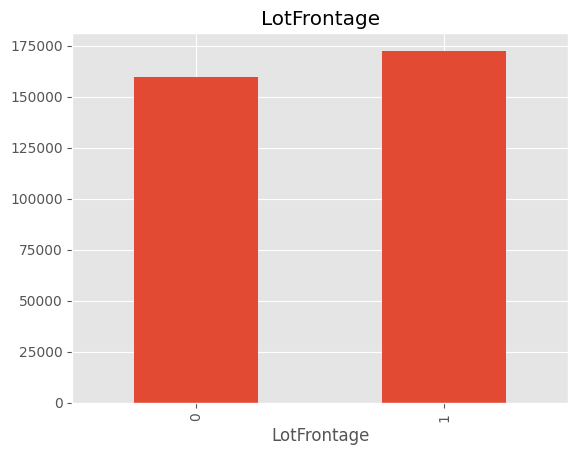

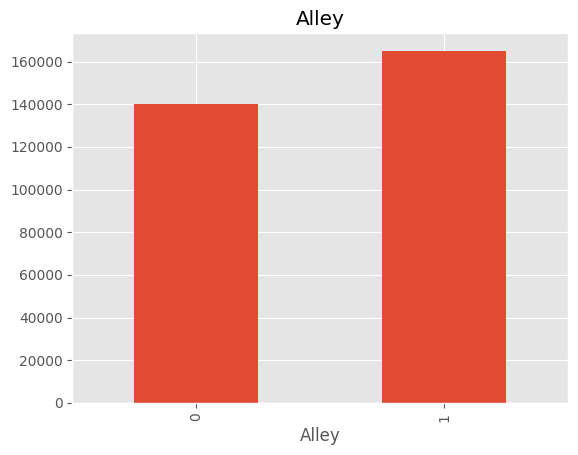

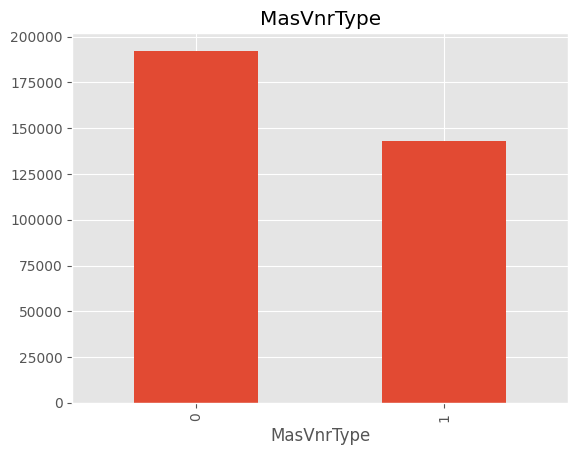

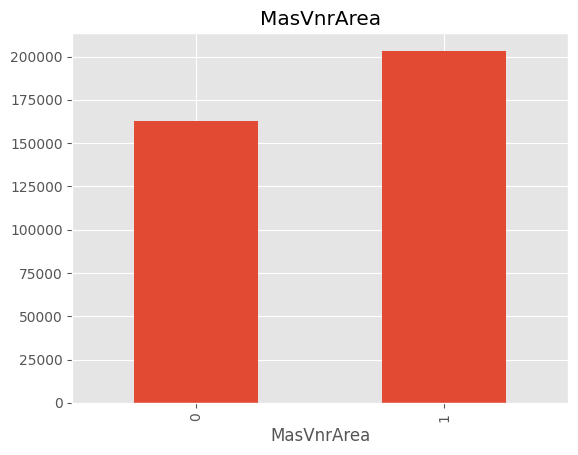

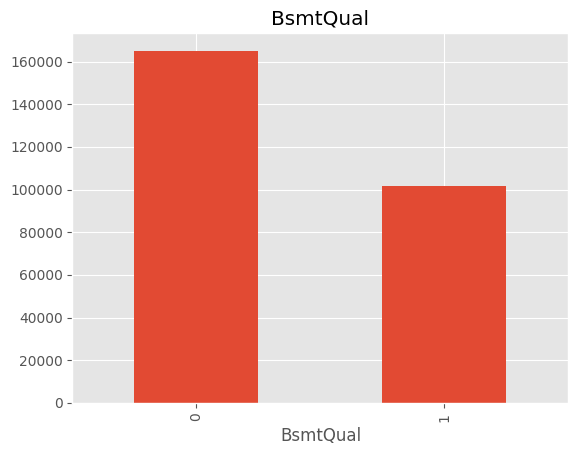

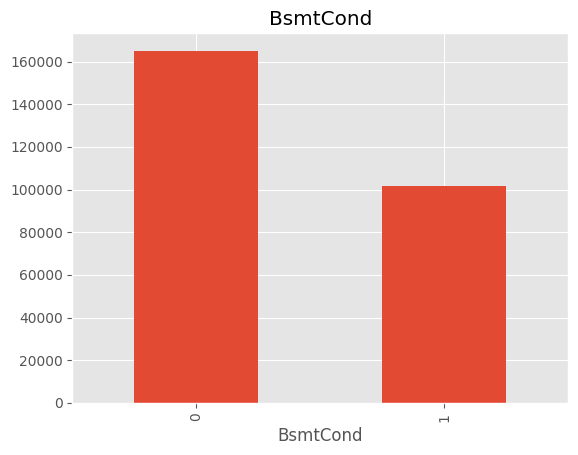

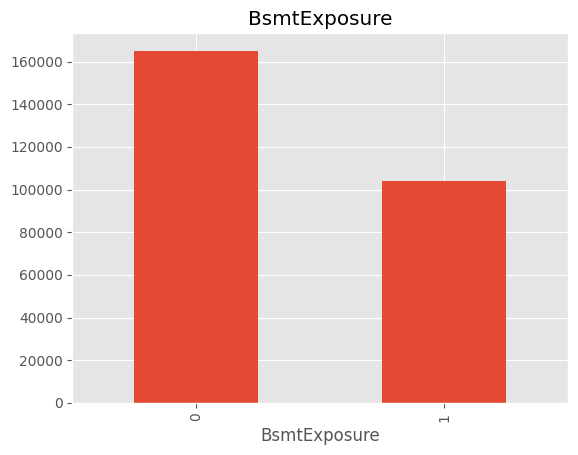

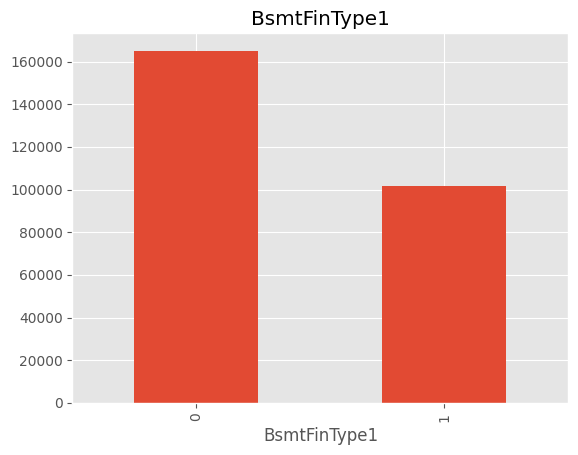

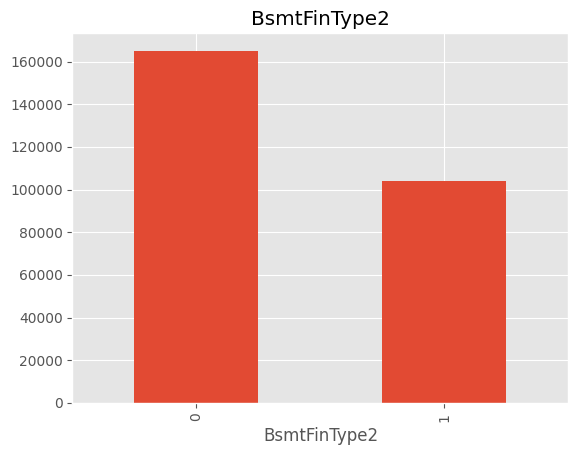

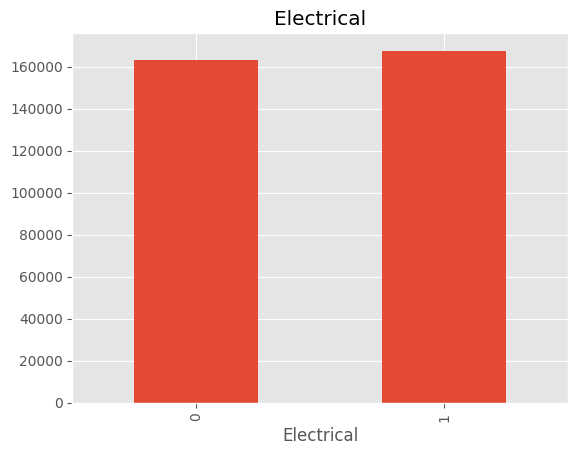

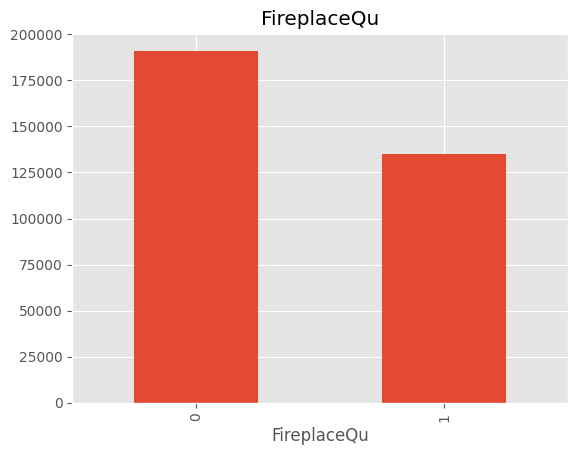

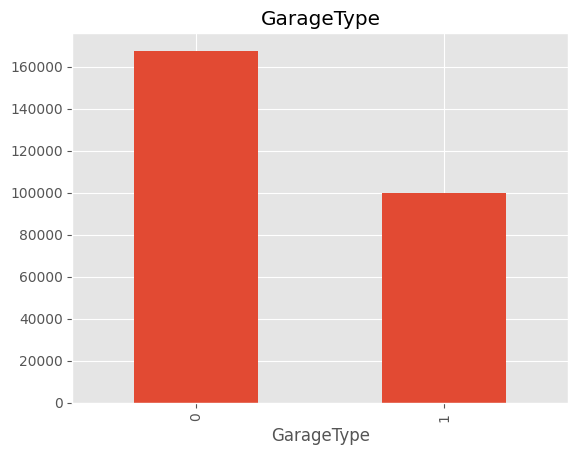

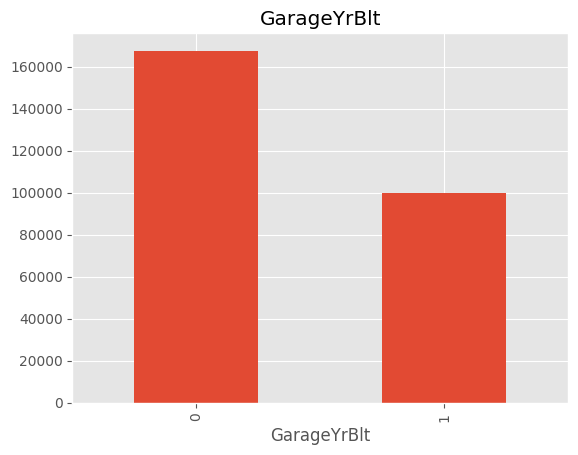

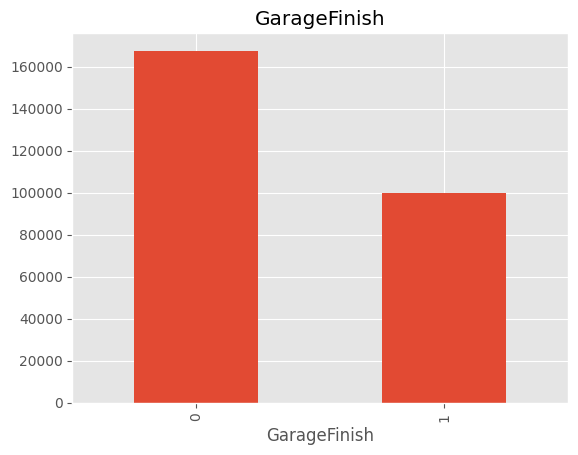

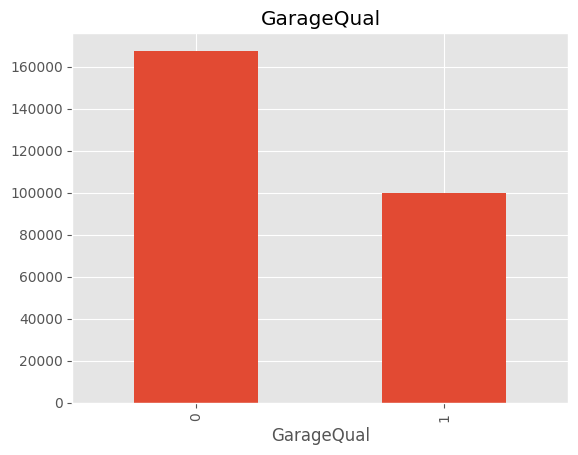

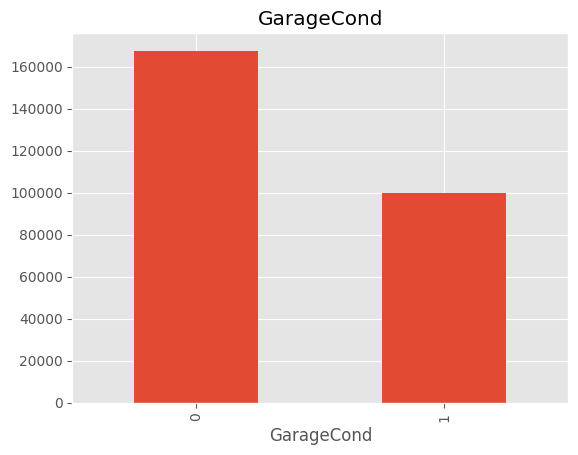

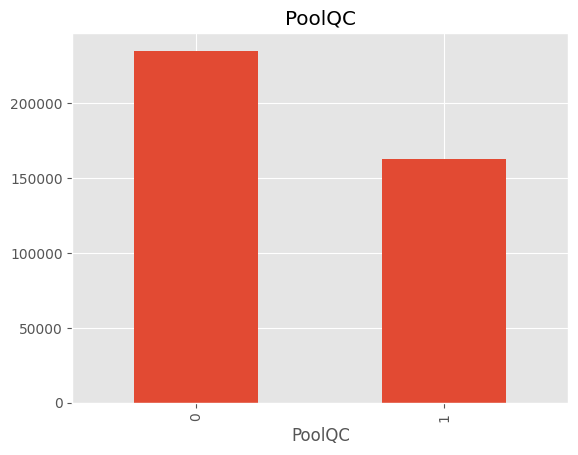

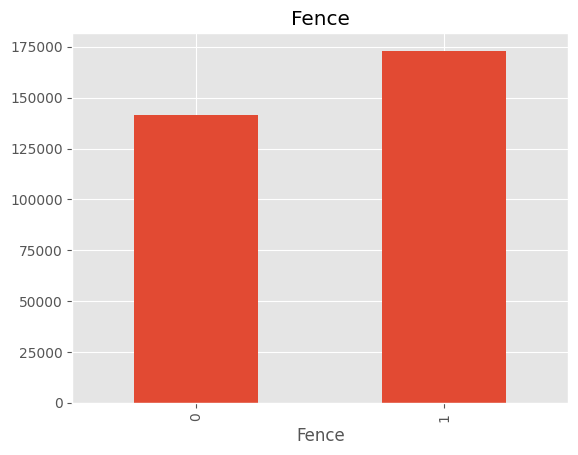

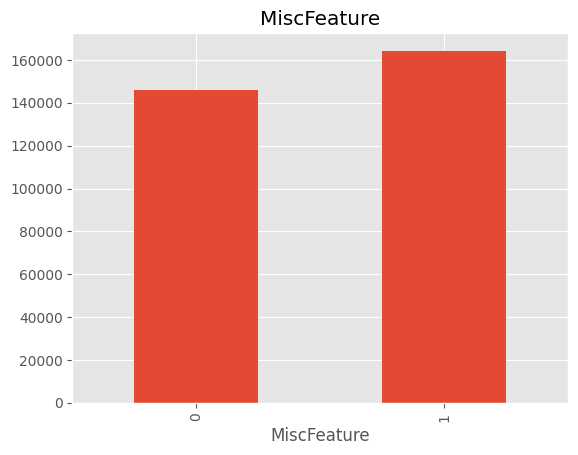

In [8]:
for feature in features_with_na:
    data = train.copy()

    # making a variable that indicates 1 if the observation was missing and 0 if not
    # in simple, converting missing values to 1 and others to 0
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # calculating the mean SalePrice where the info is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

**Observation**
Here, we can see that the missing values are impacting the SalePrice to a great extend.

   1. In case of some feature, with high number of missing values, the median SalePrice is also high.
   2. In other cases, with less number of missing values, less is the median SalePrice.

### 2. Checking for Numerical Variables

In [9]:
# List of numerical features
num_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
# 'O' means object, i.e. if not Object than obviously it's numerical
print("No. of numerical features: ", len(num_features))

train[num_features].head()

No. of numerical features:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables (eg: datetime variables)
In the dataset, we have 4 Year variables. We need to extract information from these features such as No. of years or No. of days. One example in this specific scenario can be the difference in years between the house was build and the year it was sold. This will be considerd in the feature engineering part.

In [10]:
# List of varables that contain Year variables
year_features = [feature for feature in num_features if 'Yr' in feature or 'Year' in feature]
# we used the above logic because all the year variables have either 'Yr' or 'Year' in its name

print("Year Variables: ", year_features)

Year Variables:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Having a look at the year variables:

In [11]:
for i in year_features:
    print(i, train[i].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0, 0.5, 'Median House Price')

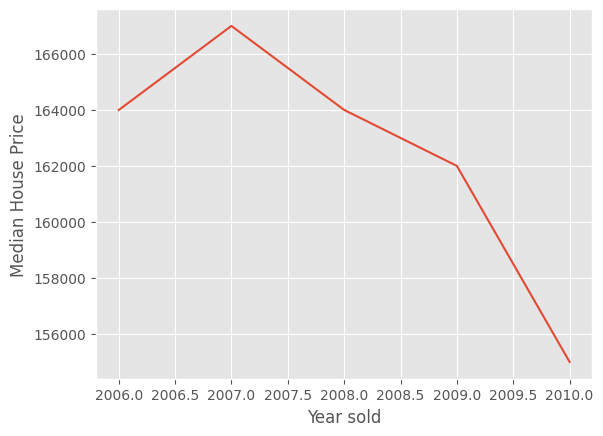

In [12]:
# Analyzing the Temporal datetime variable
# Checking for relation between house sold year and sales price

train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year sold")
plt.ylabel('Median House Price')

We can see that the Sale Price is decreasing as the advancement in time which is not quite acceptable as we know that in real life, the opposite only happens.

So, we will try to compare thr difference between all year feature with the SalePrice.

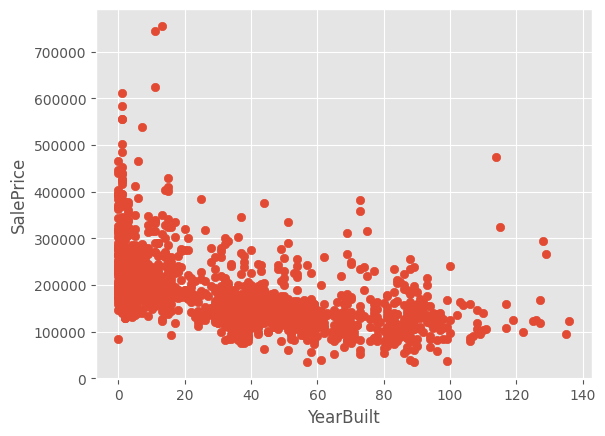

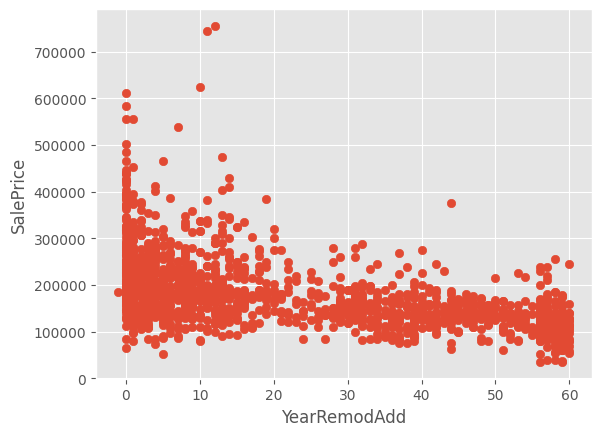

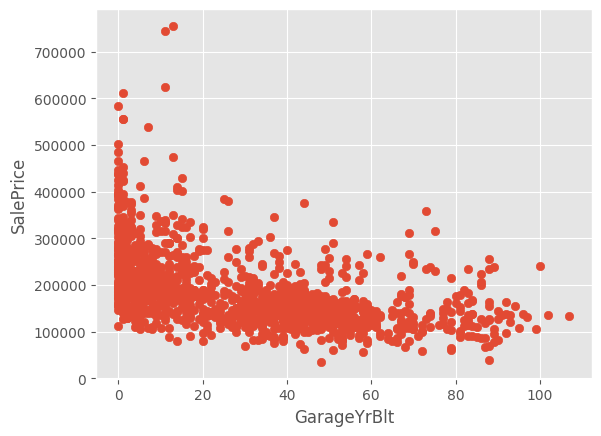

In [13]:
for feature in year_features:
    if feature != 'YrSold':
        data = train.copy()
        data[feature] = data['YrSold'] - data[feature]

        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

Now it makes sense...¶
1. The SalePrice for recently built house is high while SalePrice for house build 140 years ago is low.
2. The SalePrice of house that are remodified recently is high and low for houses that were modified very long ago.
3. Simarly it is true for the feature GarageYrBlt

Again,Numerical variables are of two types
1. Continuous and
2. Discrete


We are considering a feature to be dicrete if it has less than 25 unique values and are not part of Year Features and Id

In [14]:
discrete_feature=[feature for feature in num_features if len(train[feature].unique())<25
                  and feature not in year_features+['Id']]

print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [15]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Finding the relationship between discrete and dependent variables:


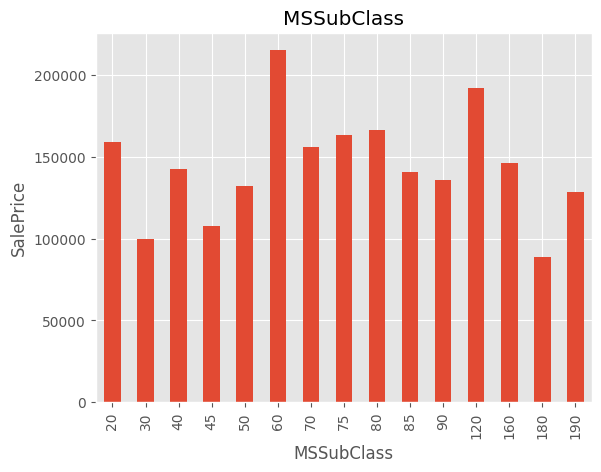

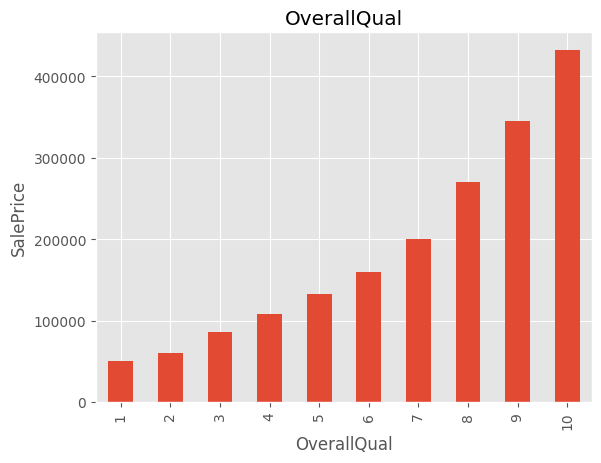

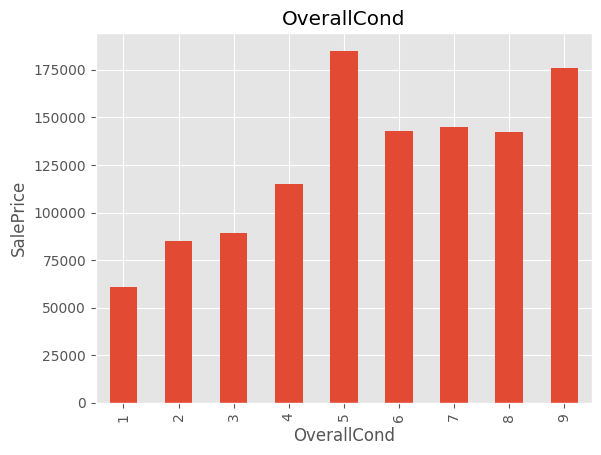

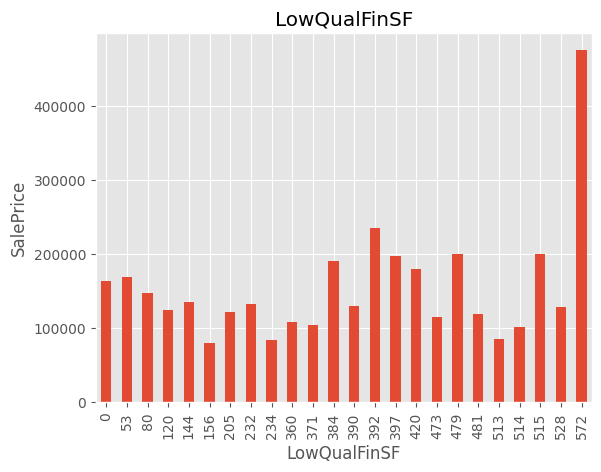

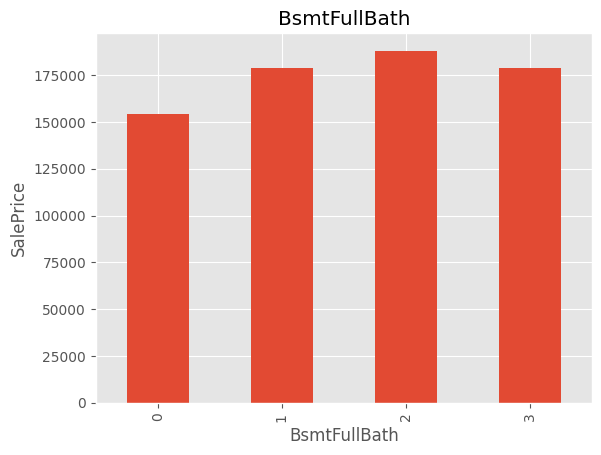

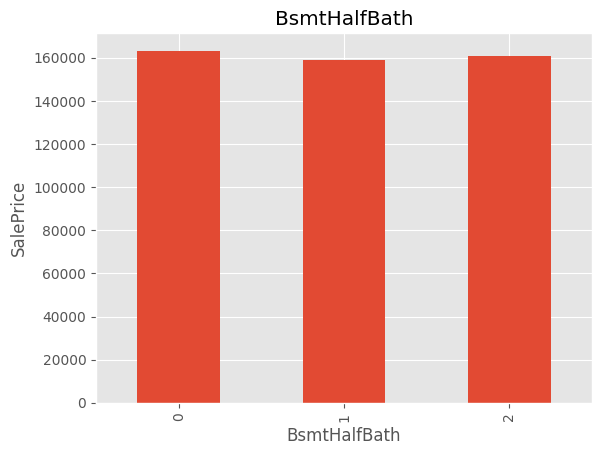

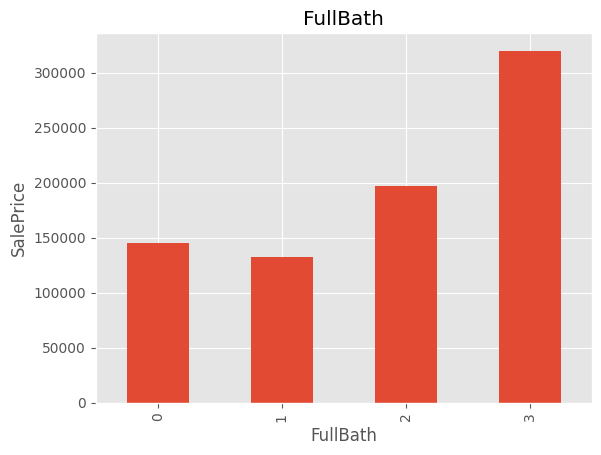

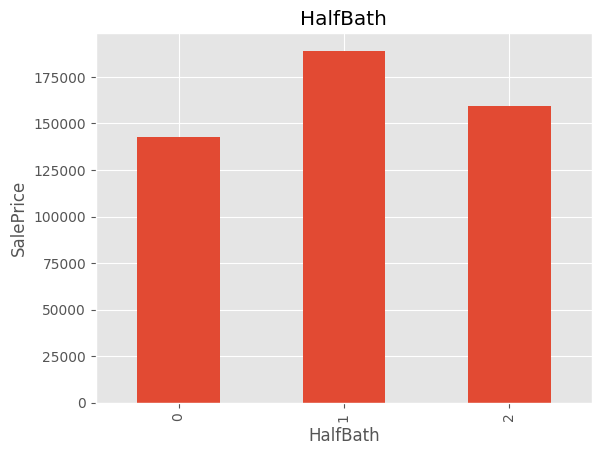

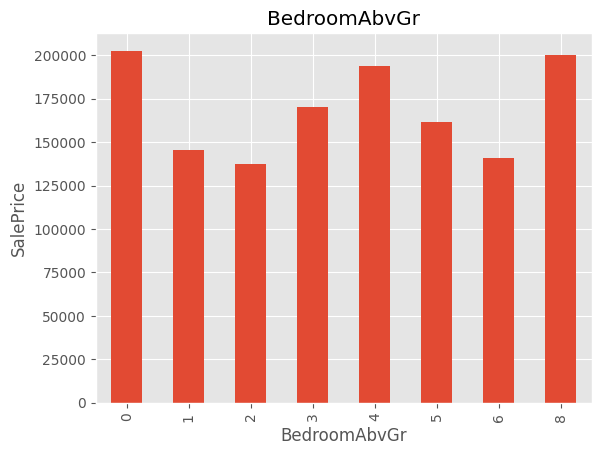

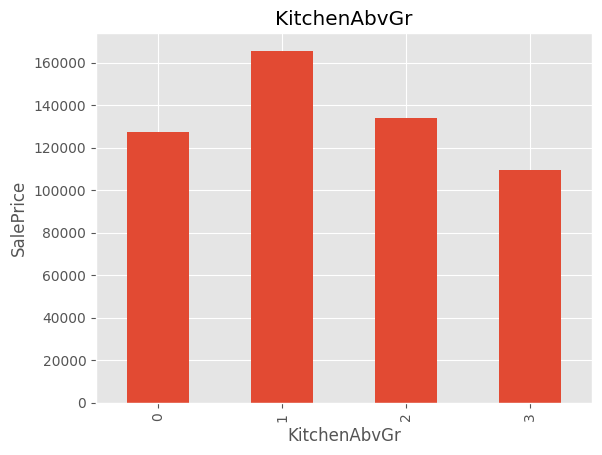

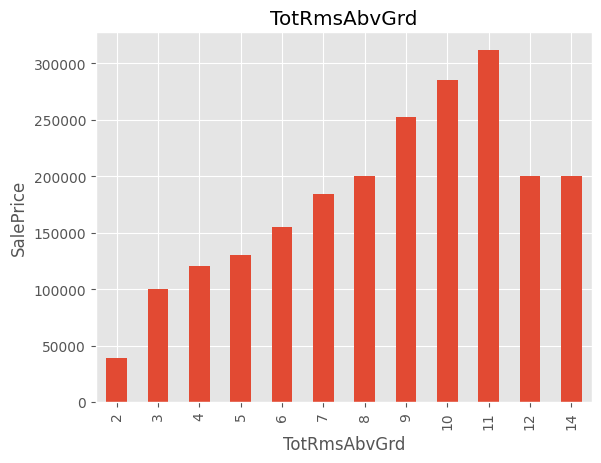

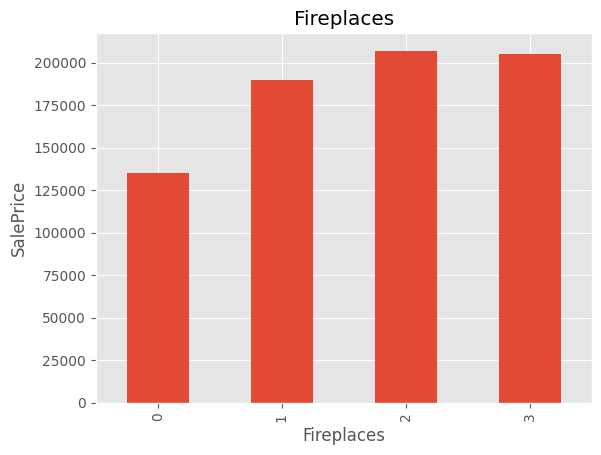

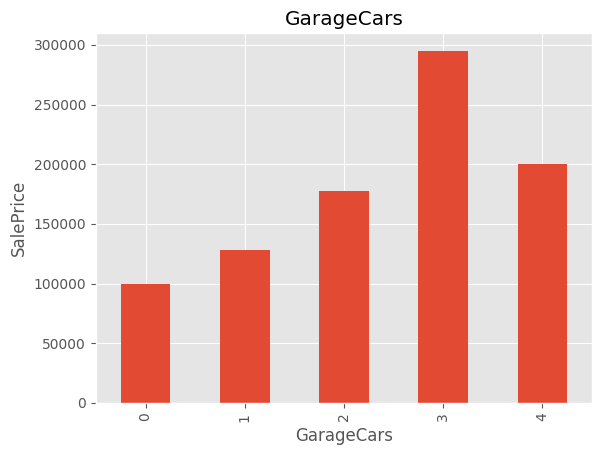

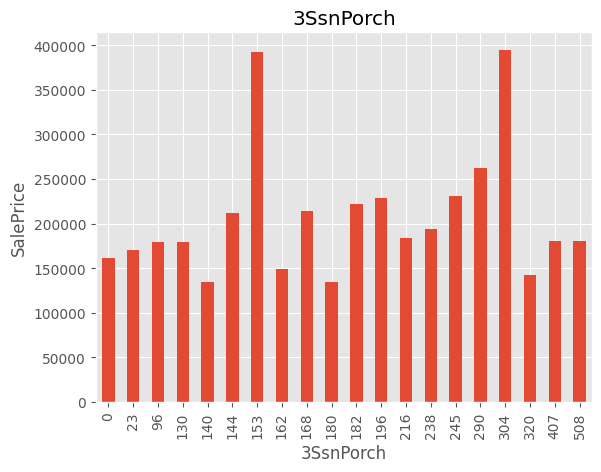

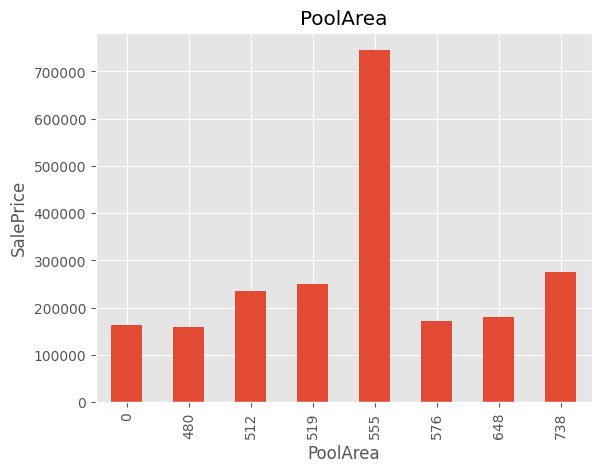

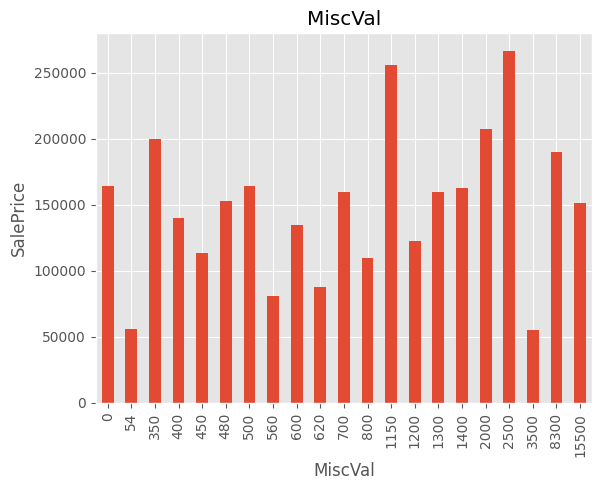

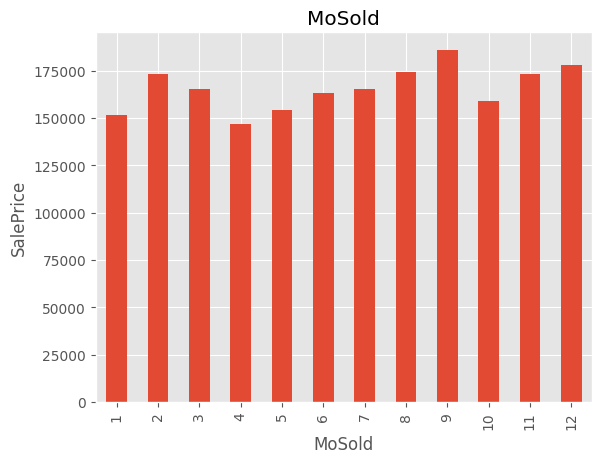

In [16]:
for feature in discrete_feature:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show()

Observations:

1. With the increase in overall quality, the SalePrice is exponentially increasing (a monotonic relationship).
2. There are some relationship between discrete and dependent variable

#### Continuous variables

In [17]:
contin_feature=[feature for feature in num_features if feature not in discrete_feature+ year_features+['Id']]
print("No. of Continuous Features: {}".format(len(contin_feature)))

No. of Continuous Features: 16


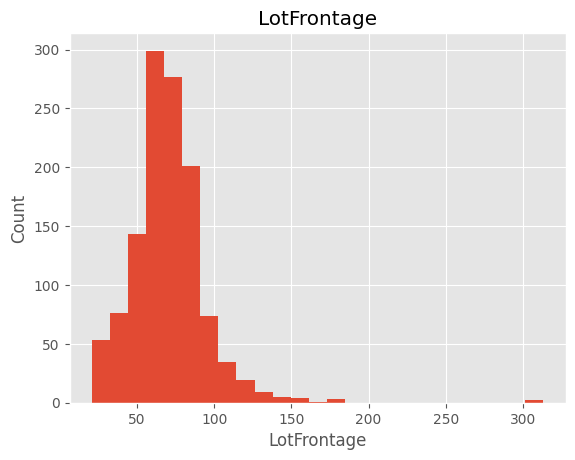

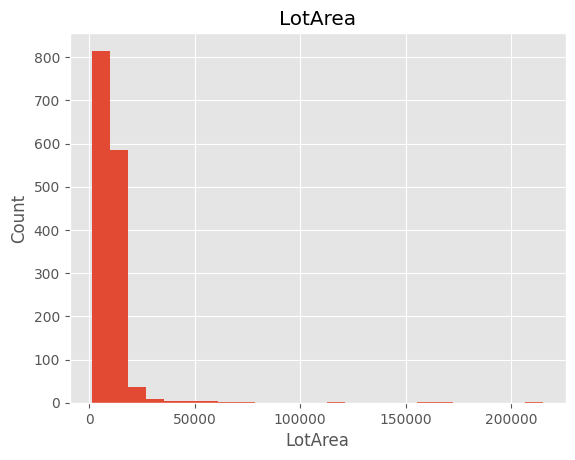

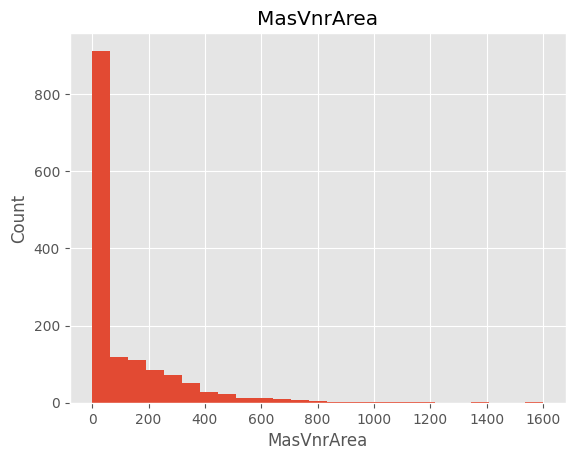

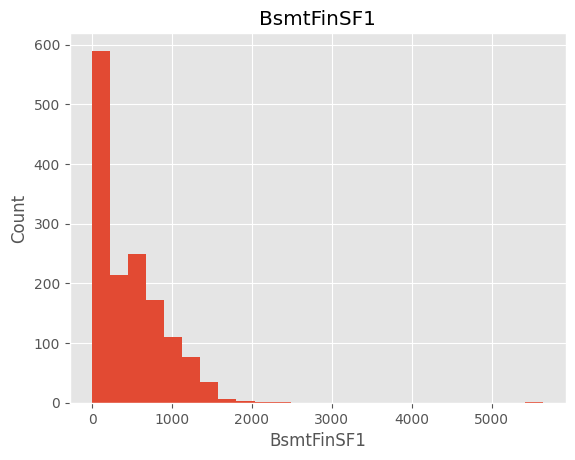

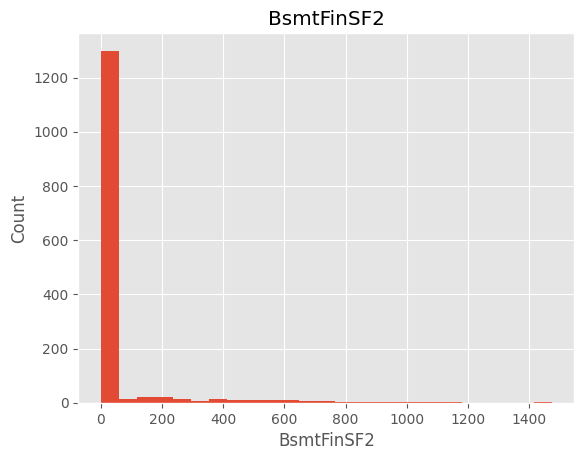

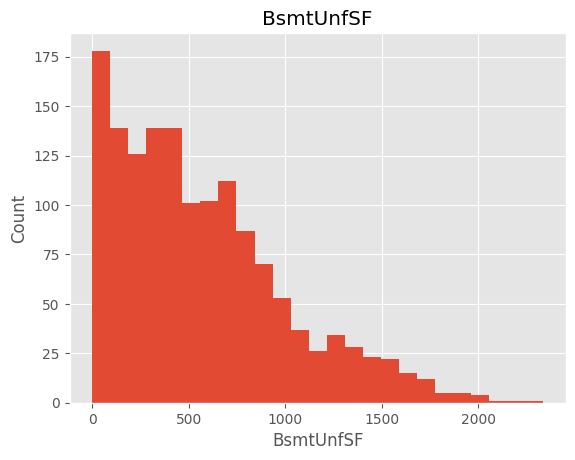

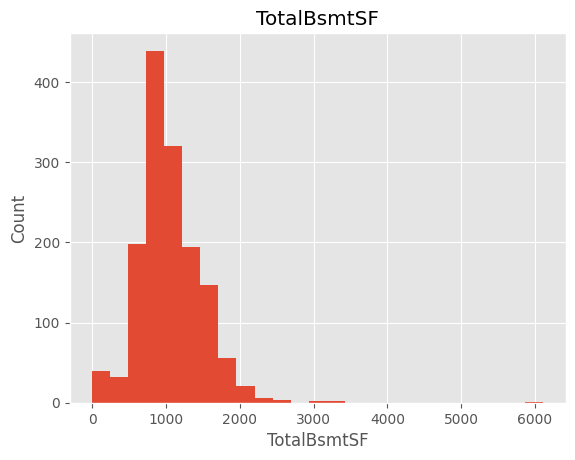

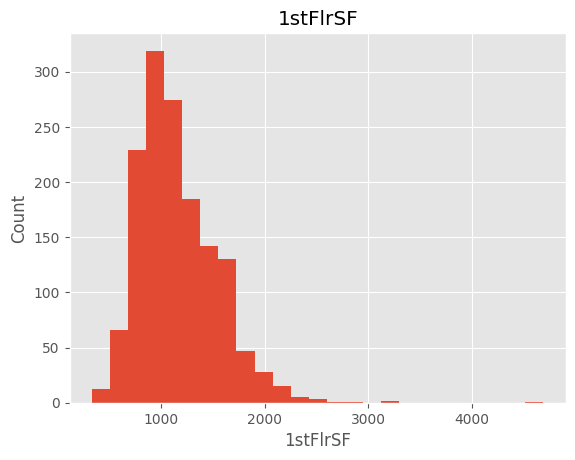

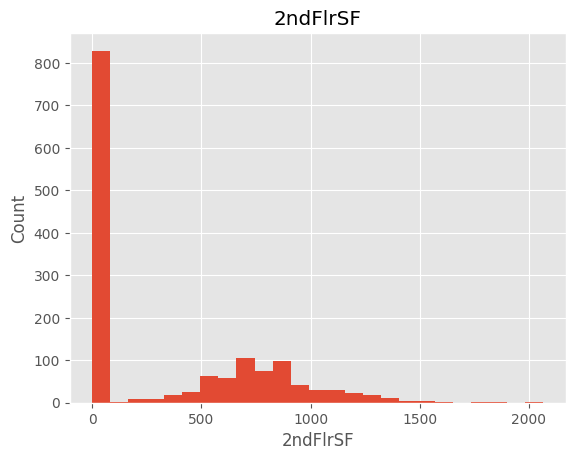

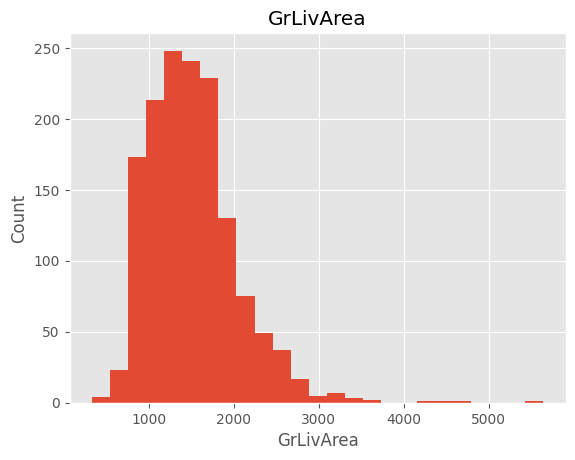

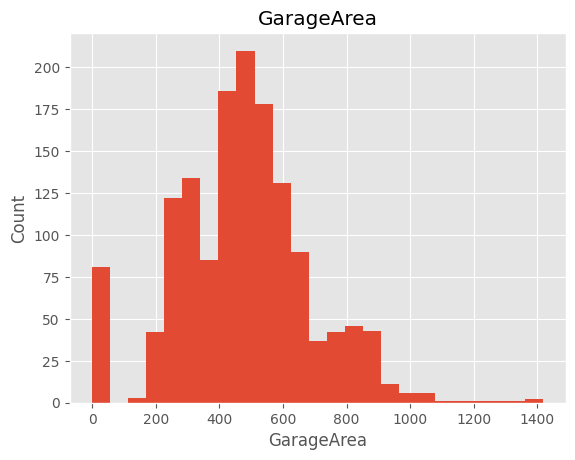

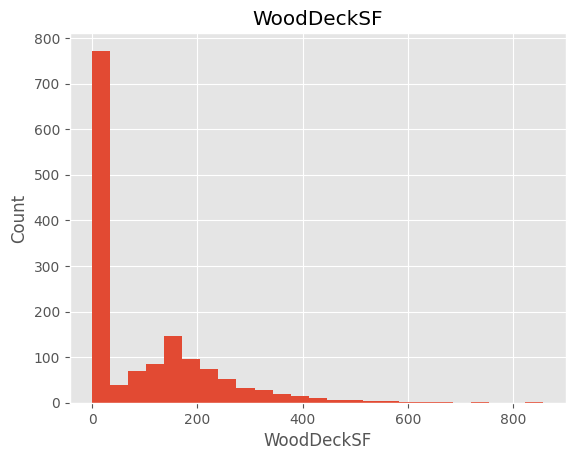

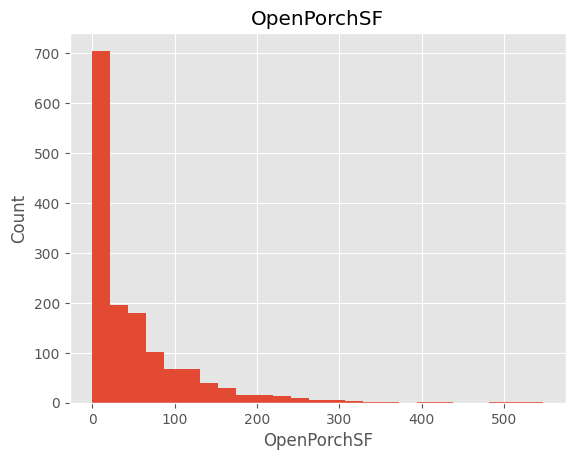

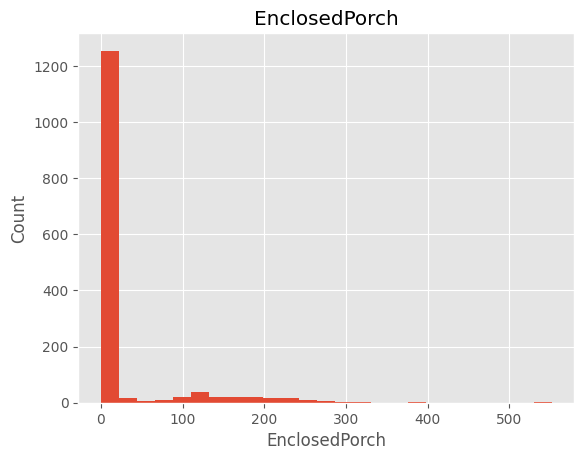

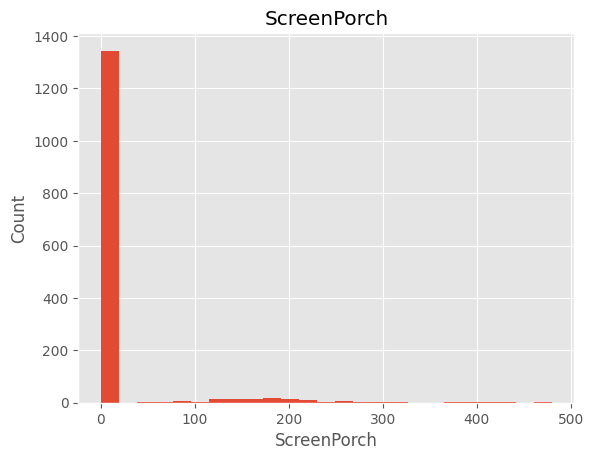

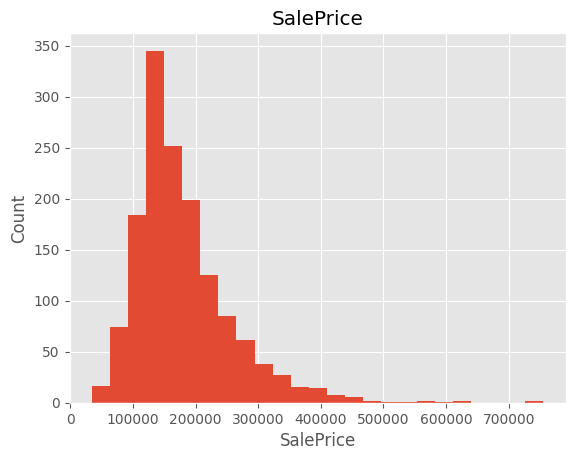

In [18]:
# Creating histograms because we are trying to find out the distribution of the continuous variables
for feature in contin_feature:
    data = train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Most of the continuous distribution are not in normal (Gaussian) distribution form but skewed.

We need to keep in mind that, while dealing a regression problem with non-normal data, we need to convert them into normal (by log normal dist) for better working of the model.

WE will using Logarithmic Transformation to convert the skewed continous var to normal in the feature engineering part


Checking the COntinuous Variables after using Log Normal Transformation:

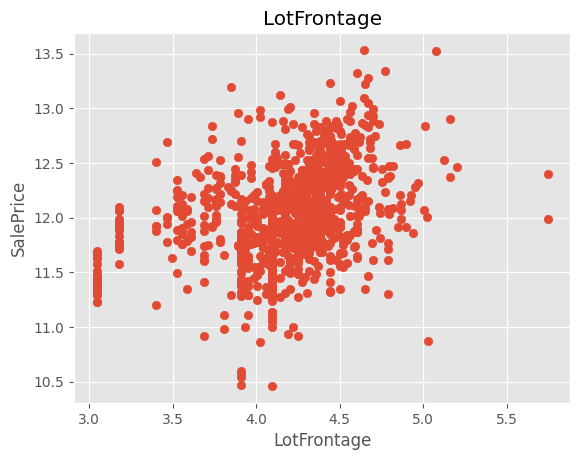

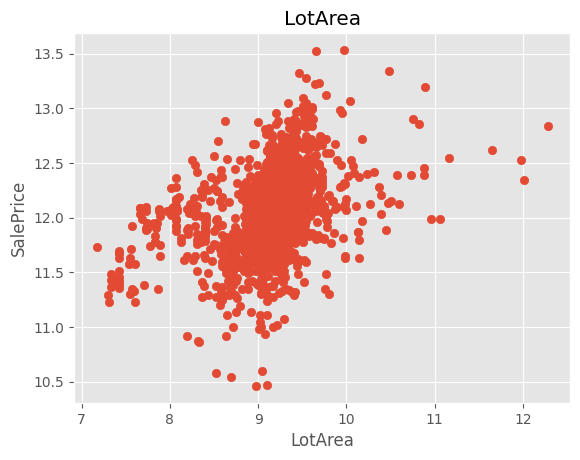

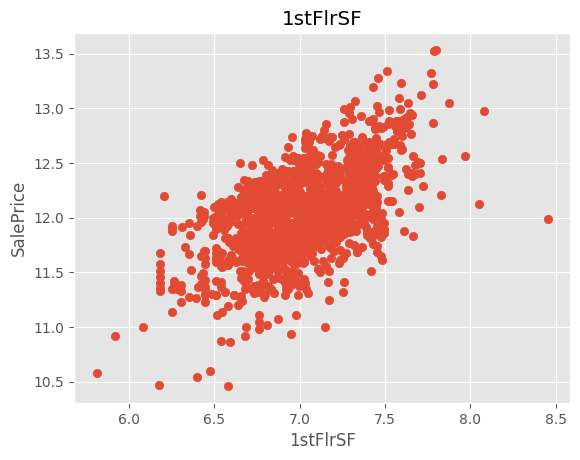

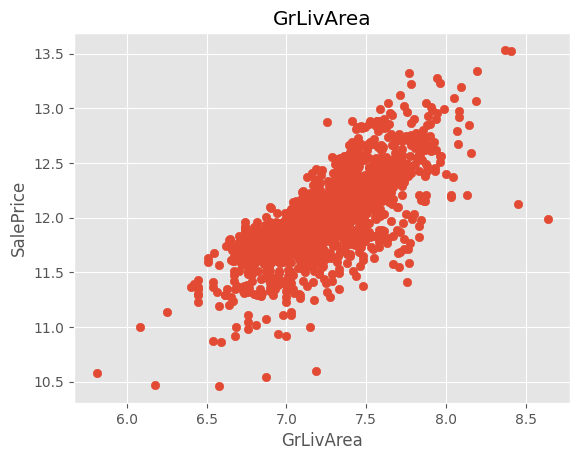

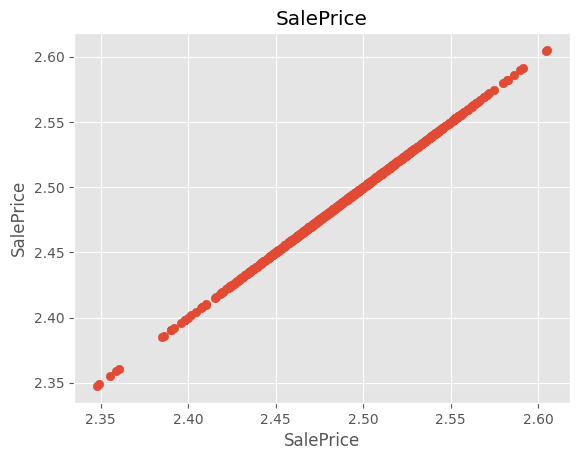

In [19]:
for feature in contin_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice']= np.log(data['SalePrice'])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

After applying the log normal transformation and plotting the distribution we can see that there's a **Monotonic Relation** between the continuous features and the dependent variables

### 3. Outliers

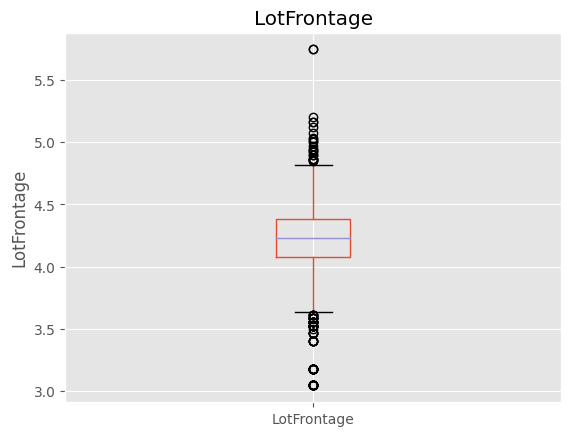

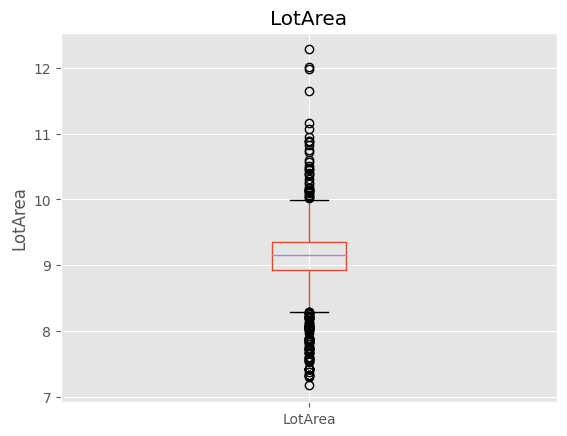

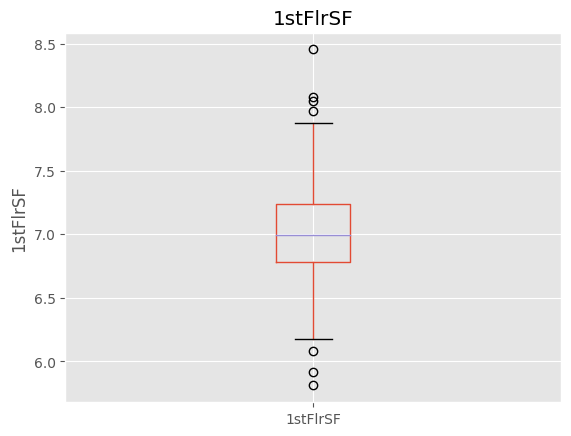

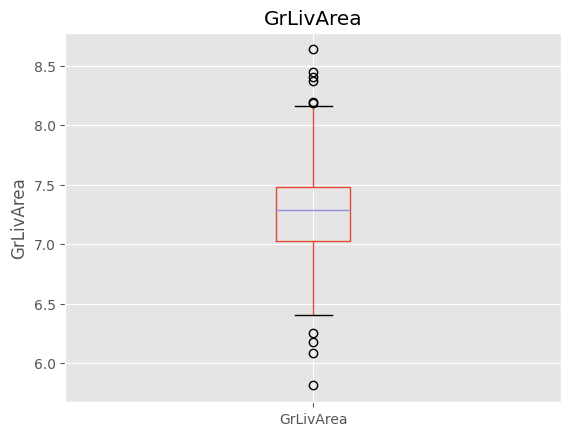

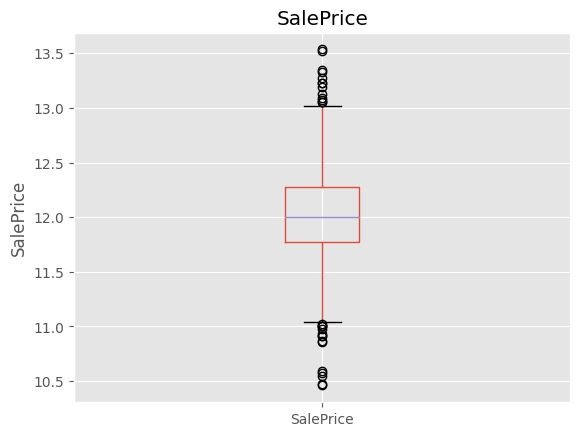

In [20]:
# Finding the outliers

for feature in contin_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

There's a lot of outliers in our continuous variables. We need to take care of these in the future steps.

### 4. Categorical Features

In [21]:
categorical_feature=[feature for feature in train.columns if train[feature].dtype=='O']

#len(categorical_feature)
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
train[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Finding out how many categories each of the categoricl features are having:


In [23]:
for feature in categorical_feature:
    print('The feature {} has {} No. of categories'.format(feature, len(train[feature].unique())))

The feature MSZoning has 5 No. of categories
The feature Street has 2 No. of categories
The feature Alley has 3 No. of categories
The feature LotShape has 4 No. of categories
The feature LandContour has 4 No. of categories
The feature Utilities has 2 No. of categories
The feature LotConfig has 5 No. of categories
The feature LandSlope has 3 No. of categories
The feature Neighborhood has 25 No. of categories
The feature Condition1 has 9 No. of categories
The feature Condition2 has 8 No. of categories
The feature BldgType has 5 No. of categories
The feature HouseStyle has 8 No. of categories
The feature RoofStyle has 6 No. of categories
The feature RoofMatl has 8 No. of categories
The feature Exterior1st has 15 No. of categories
The feature Exterior2nd has 16 No. of categories
The feature MasVnrType has 4 No. of categories
The feature ExterQual has 4 No. of categories
The feature ExterCond has 5 No. of categories
The feature Foundation has 6 No. of categories
The feature BsmtQual has 5 N

Relationship between categorical features and dependent variable:


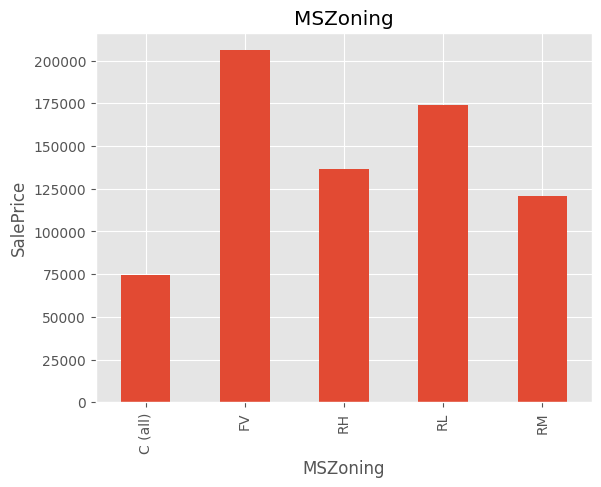

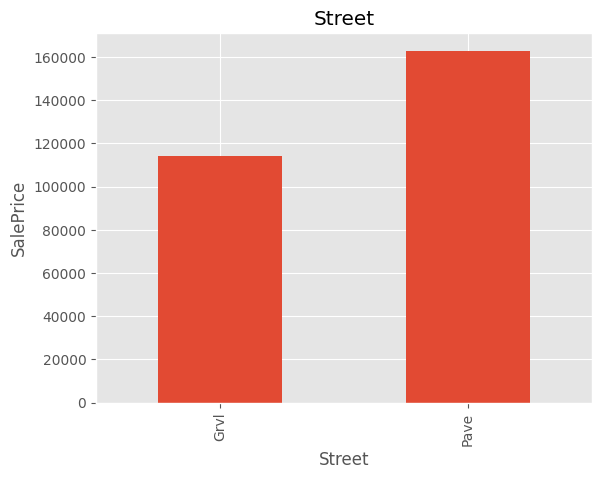

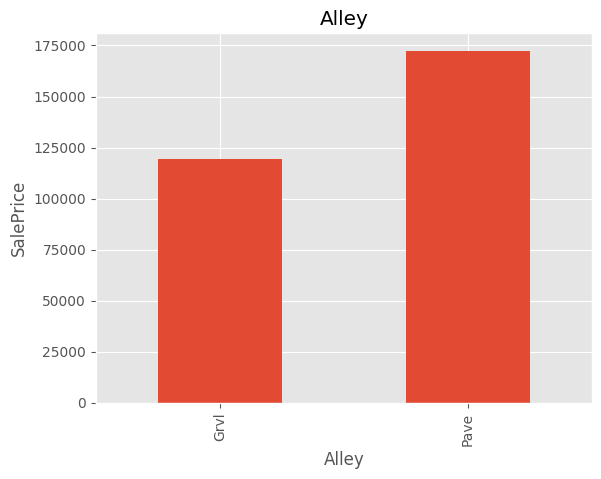

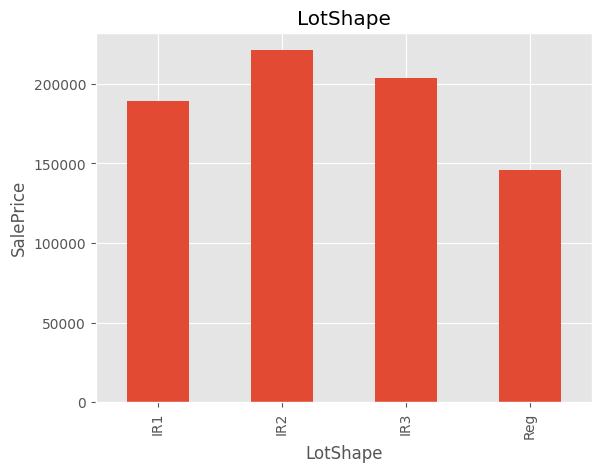

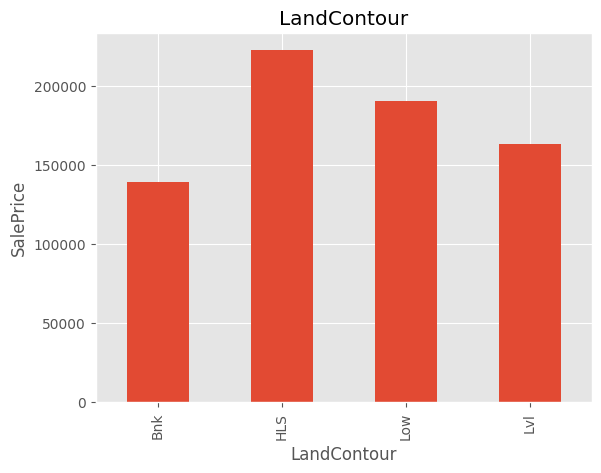

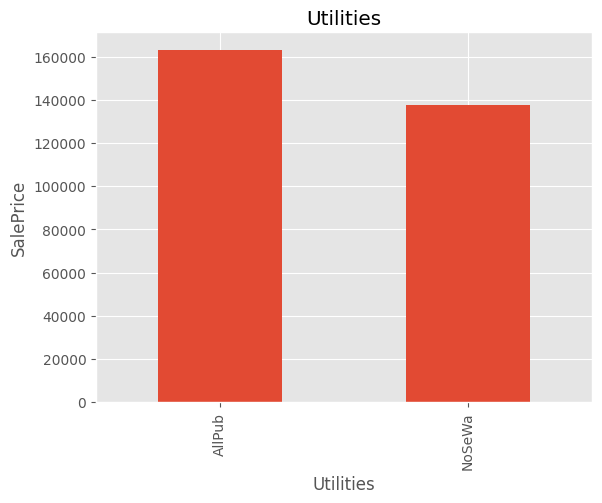

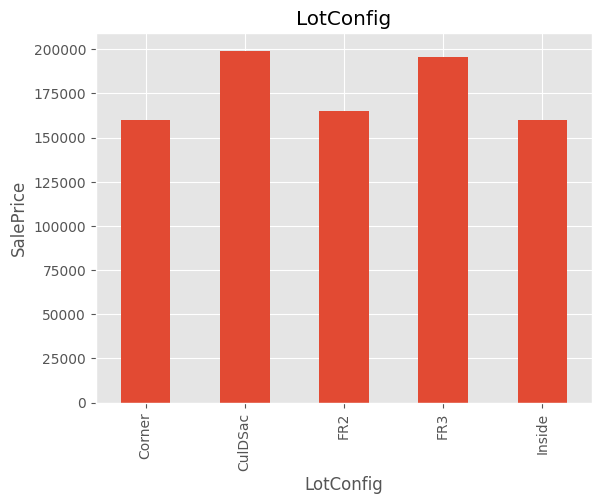

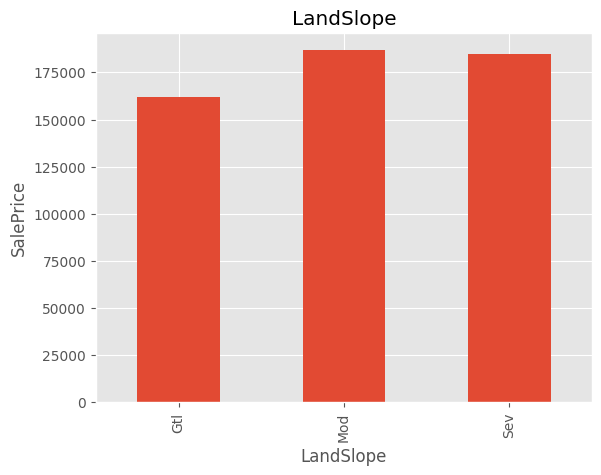

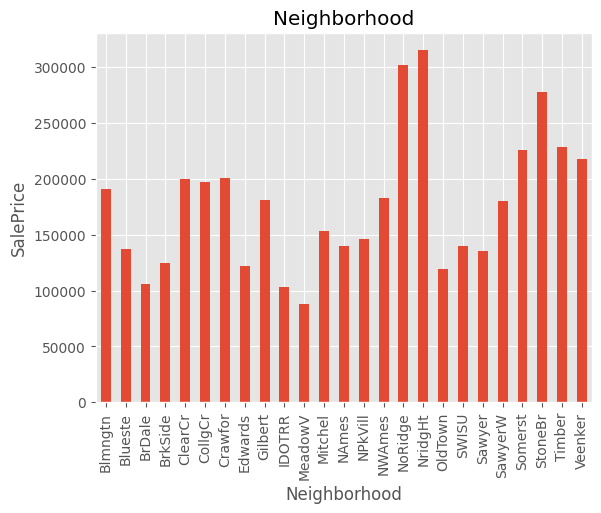

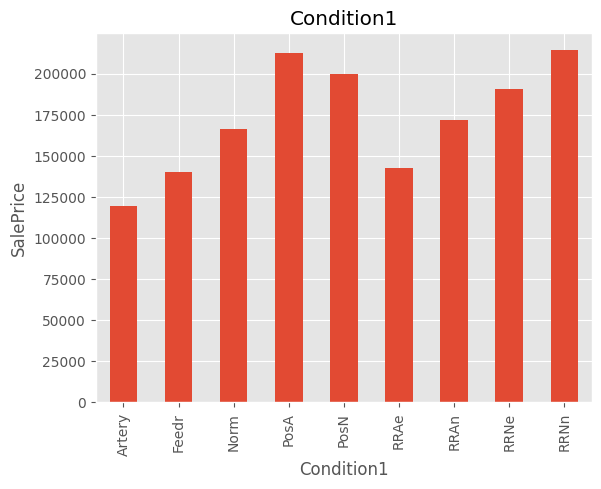

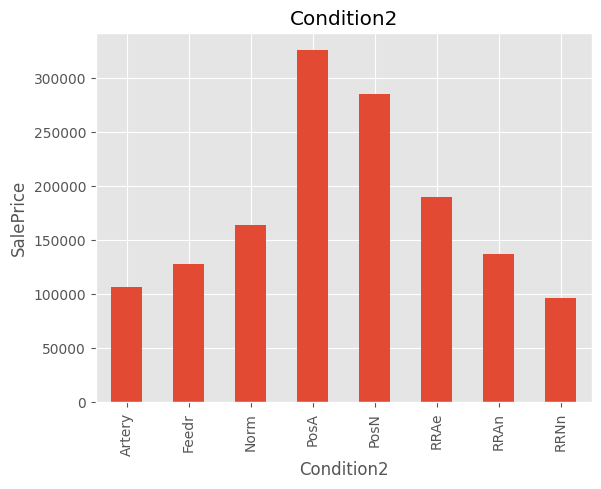

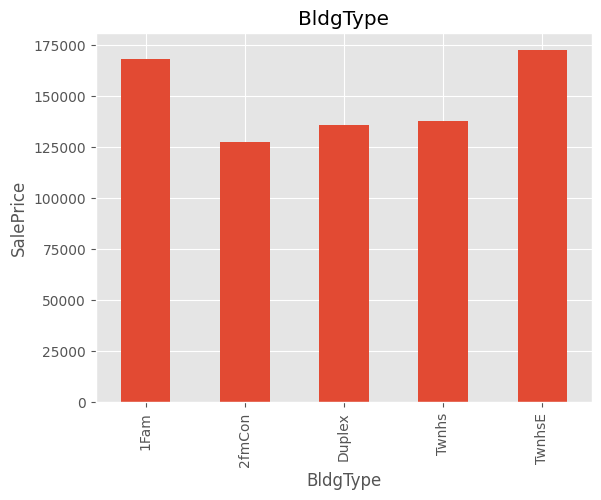

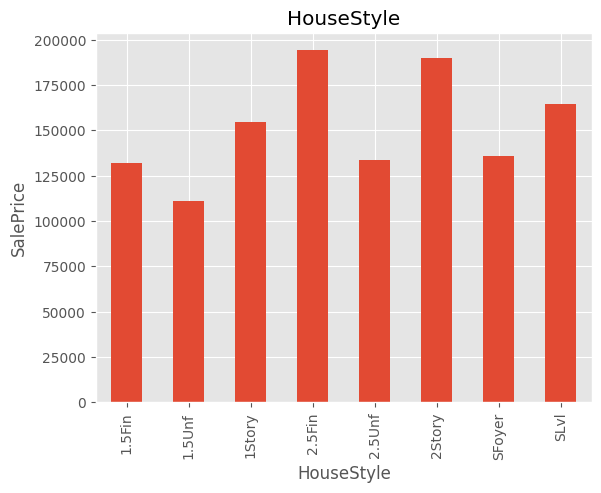

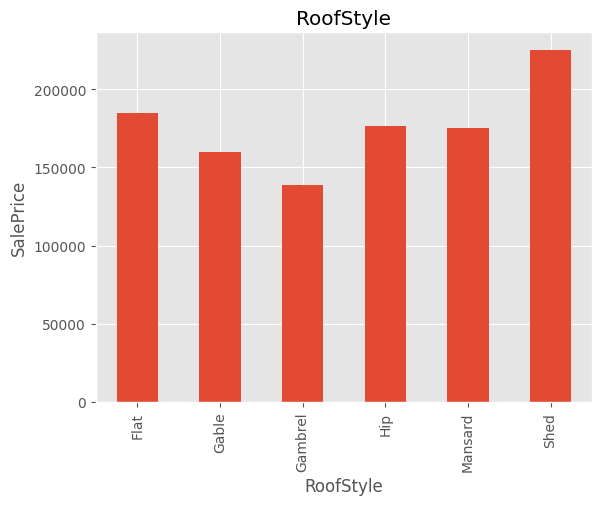

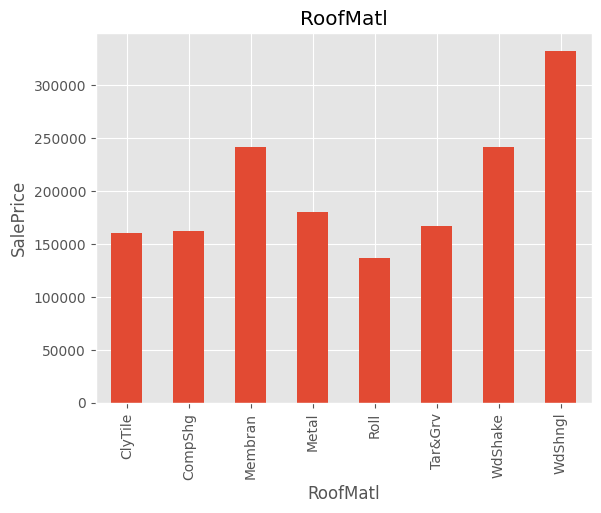

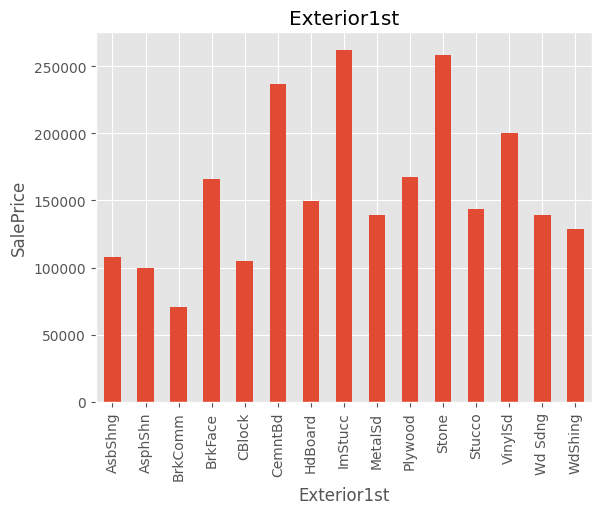

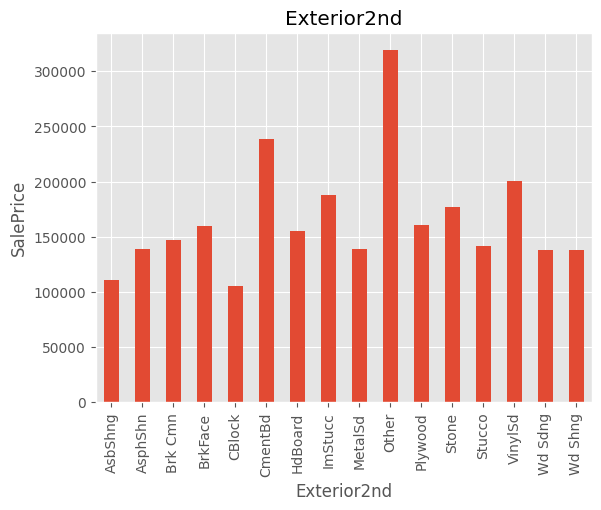

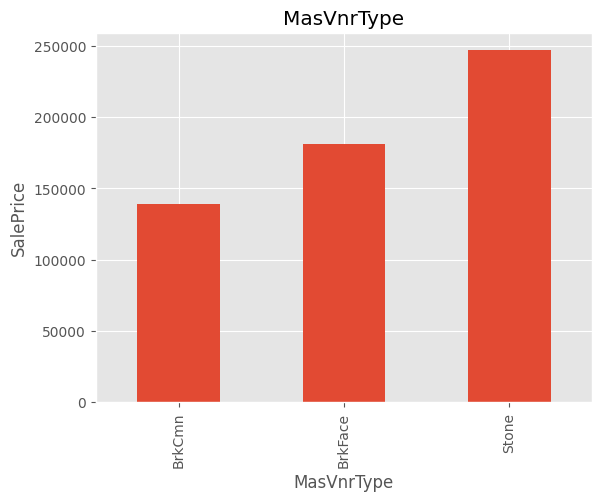

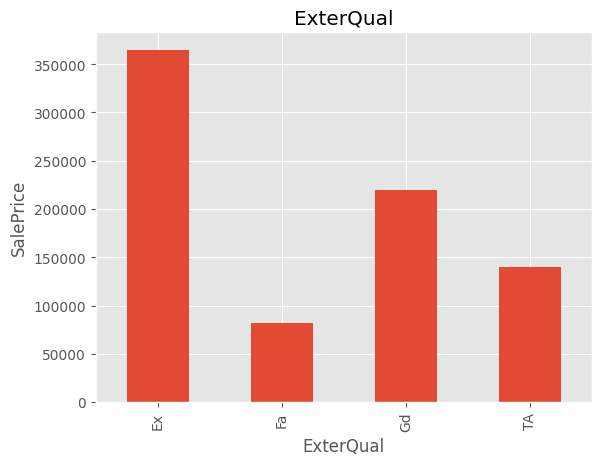

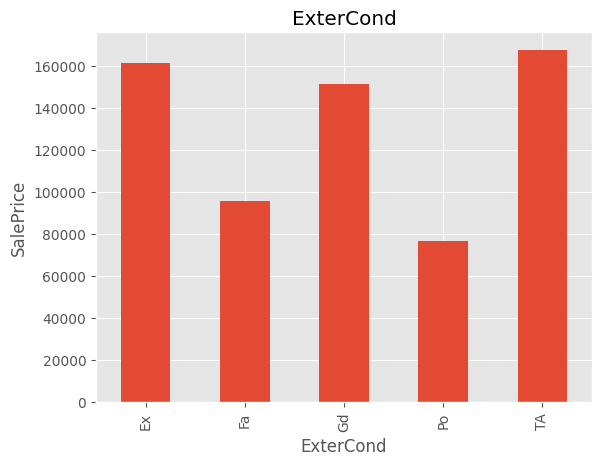

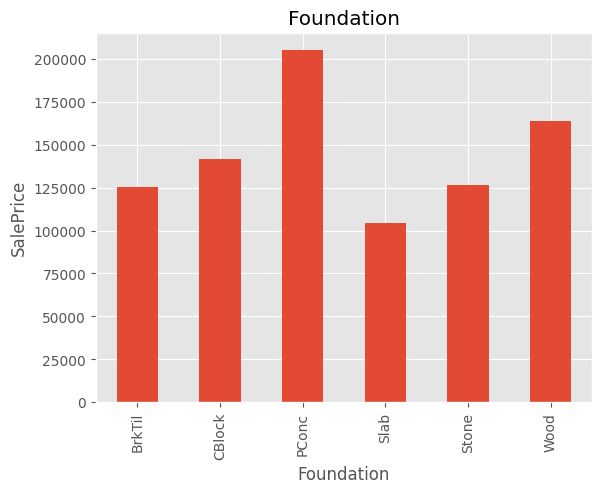

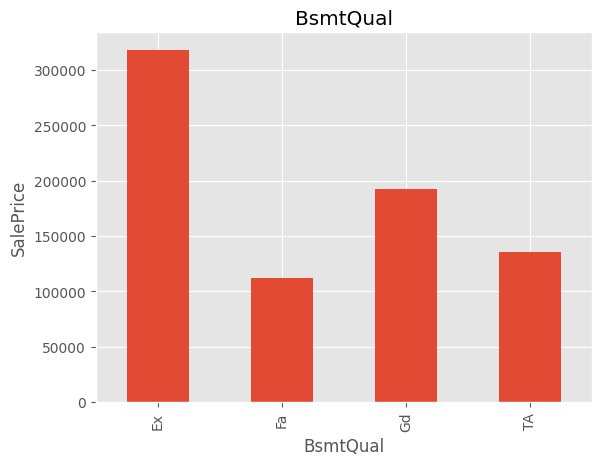

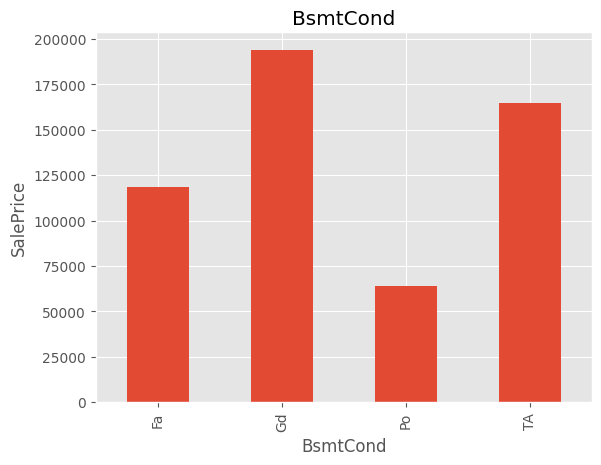

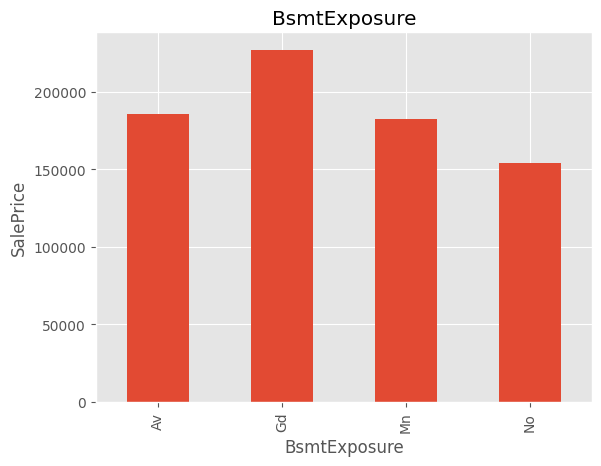

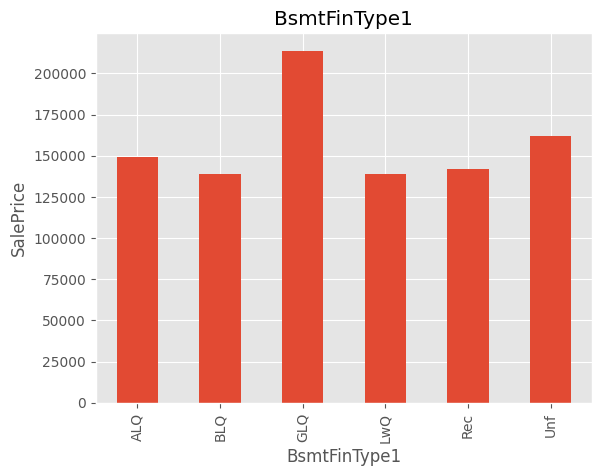

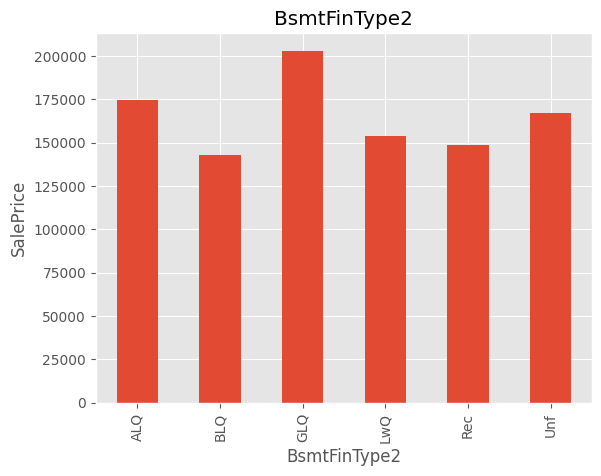

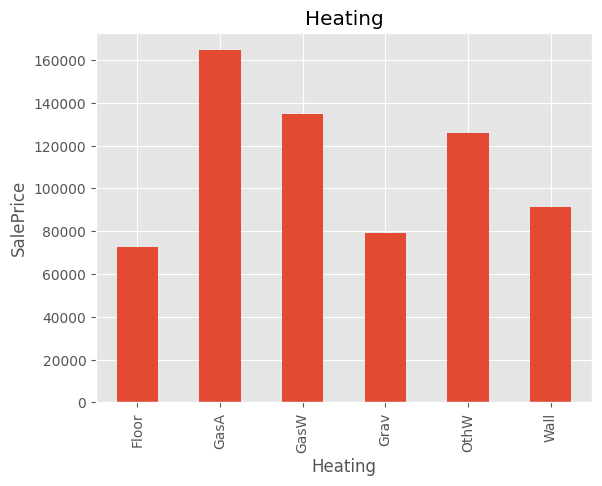

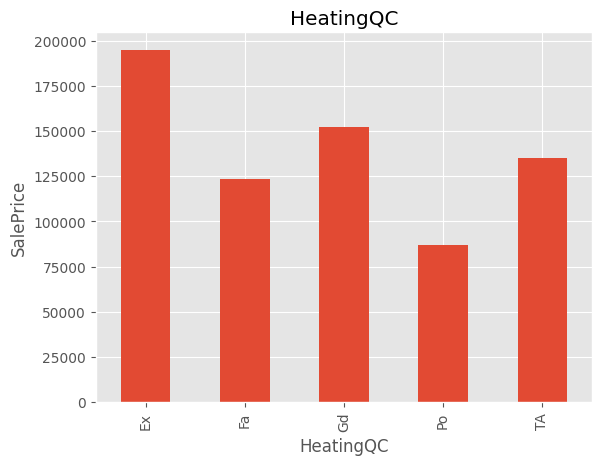

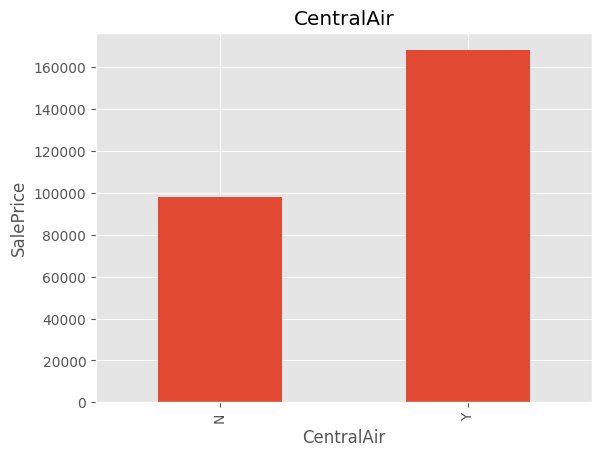

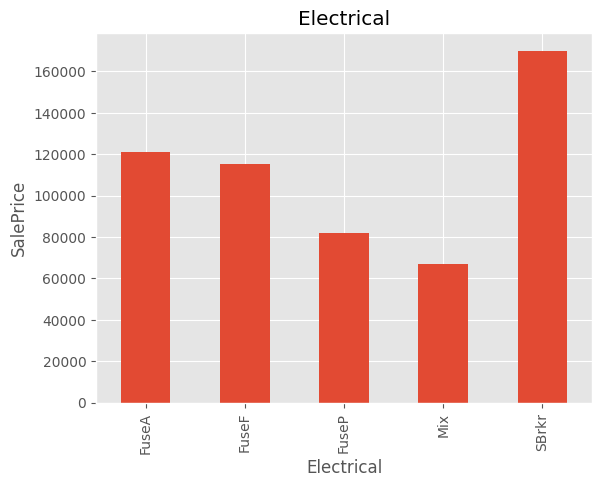

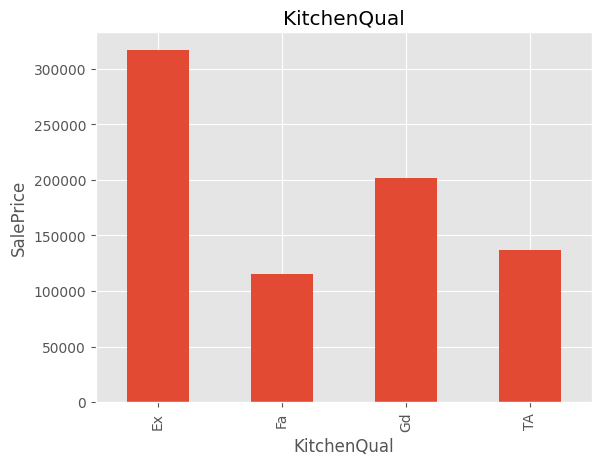

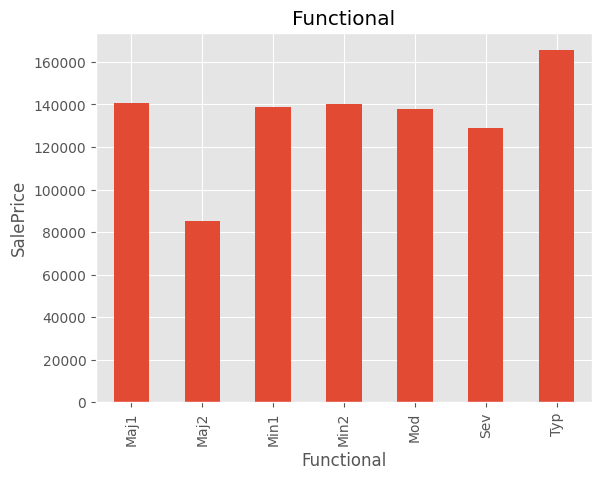

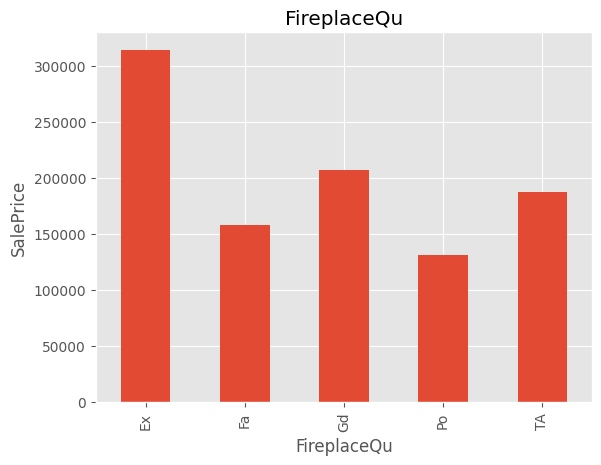

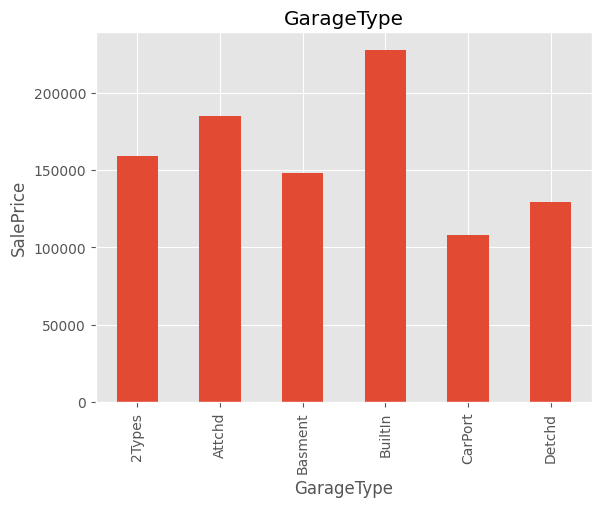

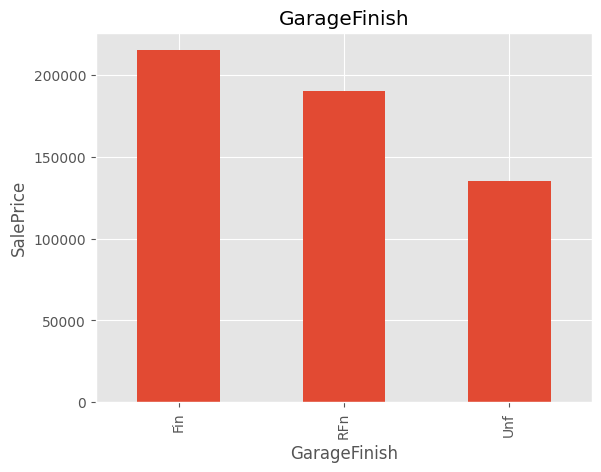

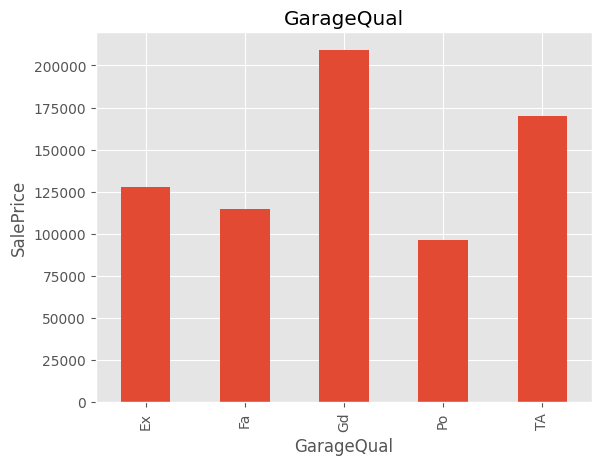

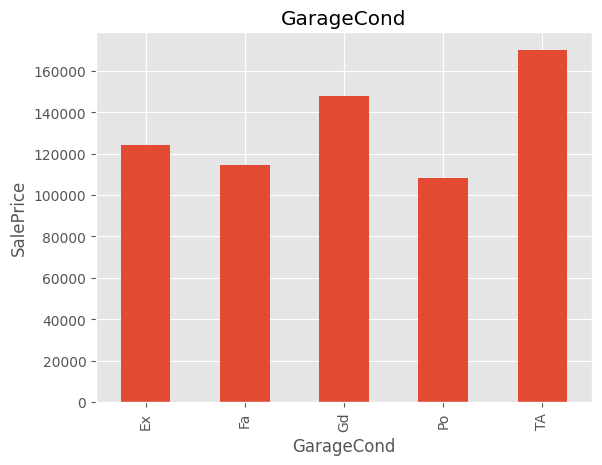

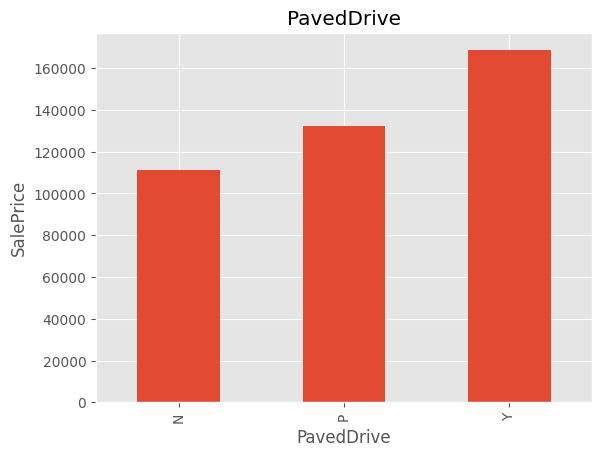

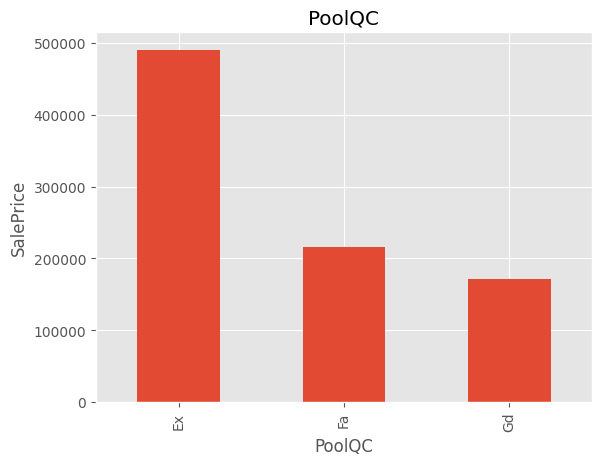

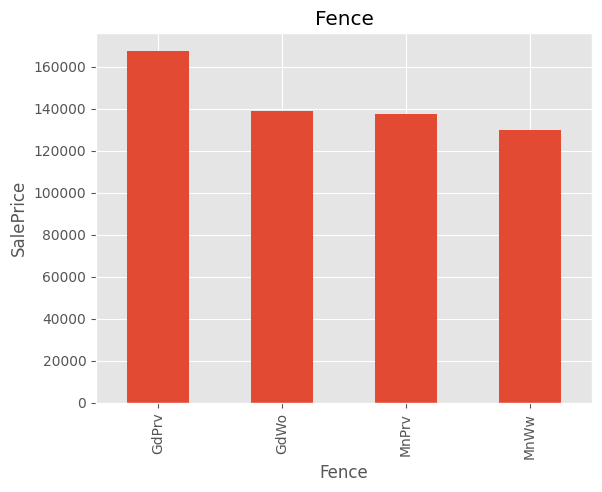

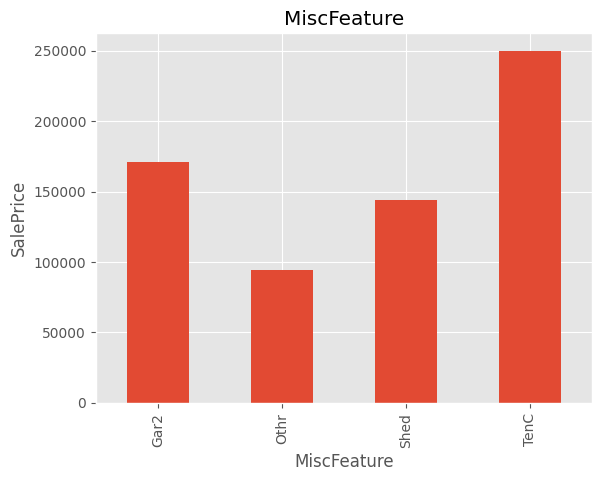

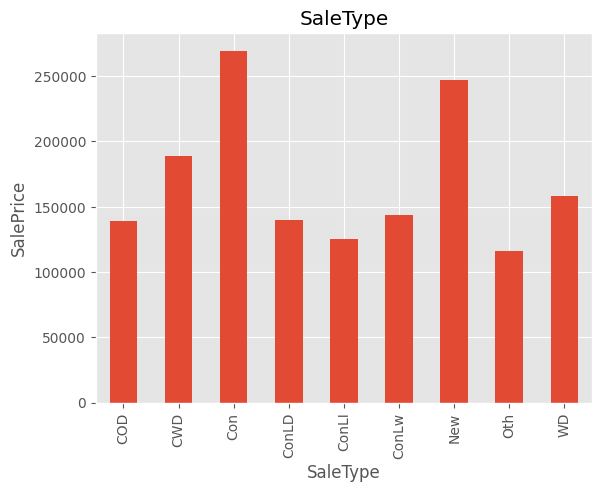

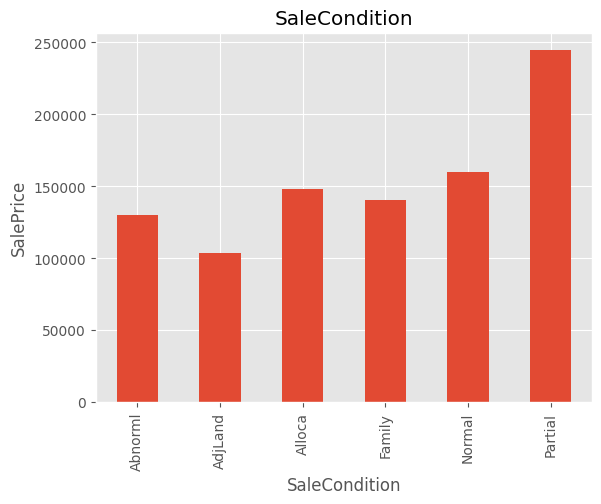

In [24]:
for feature in categorical_feature:
    data = train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

Combining the train and test data to do the feature engineering part together

Defining traget and test_id and preparing train and test set to concatinate to one set


In [25]:
target = train['SalePrice']
test_id = test['Id']

train_for_con = train.drop(['Id', 'SalePrice'], axis=1)
test_for_con = test.drop(['Id'], axis=1)

In [26]:
train_for_con.shape, test_for_con.shape

((1460, 79), (1459, 79))

Combining The test and train data:

In [31]:

combined = pd.concat([train_for_con, test_for_con], ignore_index=True)
combined.shape

(2919, 79)

## Preprocessing

In [32]:
# checking for missing values
col_with_na = [x for x in combined.columns if combined[x].isnull().sum()>0]

print("Features and its % of missing values: ")
print()
for y in col_with_na:
    print(y, np.round(combined[y].isnull().mean(), 6))

Features and its % of missing values: 

MSZoning 0.00137
LotFrontage 0.166495
Alley 0.932169
Utilities 0.000685
Exterior1st 0.000343
Exterior2nd 0.000343
MasVnrType 0.605002
MasVnrArea 0.007879
BsmtQual 0.027749
BsmtCond 0.028092
BsmtExposure 0.028092
BsmtFinType1 0.027064
BsmtFinSF1 0.000343
BsmtFinType2 0.027407
BsmtFinSF2 0.000343
BsmtUnfSF 0.000343
TotalBsmtSF 0.000343
Electrical 0.000343
BsmtFullBath 0.000685
BsmtHalfBath 0.000685
KitchenQual 0.000343
Functional 0.000685
FireplaceQu 0.486468
GarageType 0.053786
GarageYrBlt 0.054471
GarageFinish 0.054471
GarageCars 0.000343
GarageArea 0.000343
GarageQual 0.054471
GarageCond 0.054471
PoolQC 0.996574
Fence 0.804385
MiscFeature 0.964029
SaleType 0.000343


In [33]:
# Missing categorical features

col_nan = [x for x in combined.columns if combined[x].isnull().sum()>0
           and combined[x].dtypes=='O']
print("Categorical Features and its % of missing values: ")
print()
for y in col_nan:
    print(y, np.round(combined[y].isnull().mean(), 4))

Categorical Features and its % of missing values: 

MSZoning 0.0014
Alley 0.9322
Utilities 0.0007
Exterior1st 0.0003
Exterior2nd 0.0003
MasVnrType 0.605
BsmtQual 0.0277
BsmtCond 0.0281
BsmtExposure 0.0281
BsmtFinType1 0.0271
BsmtFinType2 0.0274
Electrical 0.0003
KitchenQual 0.0003
Functional 0.0007
FireplaceQu 0.4865
GarageType 0.0538
GarageFinish 0.0545
GarageQual 0.0545
GarageCond 0.0545
PoolQC 0.9966
Fence 0.8044
MiscFeature 0.964
SaleType 0.0003


We are creating a new feature with the missing categorical variables replacing NAN values by a label 'missing'

In [34]:
def replace_cat(combined, col_nan):
    data = combined.copy()
    data[col_nan]=data[col_nan].fillna('Missing')
    return data
combined = replace_cat(combined, col_nan)
combined[col_nan].isnull().any().sum()

0

Missing Numerical features:

In [35]:
num_nan = [x for x in combined.columns if combined[x].isnull().sum()>0
          and combined[x].dtypes !='O']

print("Numerical Features and its % of missing values: ")
print()
for y in num_nan:
    print(y, np.round(combined[y].isnull().mean(), 4))

Numerical Features and its % of missing values: 

LotFrontage 0.1665
MasVnrArea 0.0079
BsmtFinSF1 0.0003
BsmtFinSF2 0.0003
BsmtUnfSF 0.0003
TotalBsmtSF 0.0003
BsmtFullBath 0.0007
BsmtHalfBath 0.0007
GarageYrBlt 0.0545
GarageCars 0.0003
GarageArea 0.0003


Replacing the missing numerical values by median of that column:

In [36]:
for i in num_nan:
    median_value = combined[i].median()

    # create a new feature to capture the NAN values
    # we are replacing the nan values by 1 and others by 0 in the newly created feature
    combined[i + '_nan'] = np.where(combined[i].isnull(), 1, 0)
    combined[i].fillna(median_value, inplace=True)

combined[num_nan].isnull().any().sum()

0

For the Temporal Variables (Date Time Variables):
we are replacing the years with the difference in years from the Year of Sold


In [37]:
for x in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    combined[x] = combined['YrSold'] - combined[x]

combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# We can see the outcome of the above code as follows
combined[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


On EDA, we found that some of our features are skewed
So, we'll perform Log Normal Transformation to reduce the skewness.


In [39]:
# Skewed Features
num_features = ['LotFrontage','LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    combined[feature] = np.log(combined[feature])

combined.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,Missing,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,Missing,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Also our target, 'SalePrice' is skewed, so...
target = np.log(target)
target.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [41]:
## Handling rare categorical features
# all the categorical features in our dataset
categorical_features = [x for x in combined.columns if combined[x].dtype=='O']

for y in categorical_features:

    # finding the present % of the features
    temp = combined.groupby(y)['MSSubClass'].count()/len(combined)

    # taking the index of the features with more than 1% presence
    temp_df = temp[temp>0.01].index

    # converting the rare features to a new label 'rare_var'
    combined[y] = np.where(combined[y].isin(temp_df), combined[y], 'Rare_var')

Now the shape of our combined data...

In [42]:
combined.shape

(2919, 90)

Creating dummy variables for the categorical variables

In [43]:
combined = pd.get_dummies(combined, drop_first=True)
combined.shape

(2919, 214)

Scaling the data

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined = pd.DataFrame(scaler.fit_transform(combined),
                        columns=combined.columns)
combined.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan,MSZoning_RL,MSZoning_RM,MSZoning_Rare_var,Street_Rare_var,Alley_Missing,Alley_Pave,LotShape_IR2,LotShape_Rare_var,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_Rare_var,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_var,LandSlope_Mod,LandSlope_Rare_var,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_var,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAn,Condition1_Rare_var,Condition2_Rare_var,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_var,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Rare_var,RoofMatl_Rare_var,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_var,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_var,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Missing,MasVnrType_Rare_var,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Rare_var,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Rare_var,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_var,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Rare_var,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_var,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_Rare_var,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_var,KitchenQual_TA,Functional_Min2,Functional_Mod,Functional_Rare_var,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Missing,GarageType_Rare_var,GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Missing,GarageQual_Rare_var,GarageQual_TA,GarageCond_Missing,GarageCond_Rare_var,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Rare_var,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_Rare_var,MiscFeature_Rare_var,MiscFeature_Shed,SaleType_New,SaleType_Rare_var,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare_var
0,0.235294,0.418208,0.366344,0.666667,0.500,0.043796,0.112903,0.12250,0.125089,0.0,0.064212,0.140098,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.652866,0.4,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

### We are done with the preprocessing... Let's split the data back into train and test!

In [47]:
X_train = combined[:1460]
X_test = combined[1460:]
y_train = target

X_train.shape, X_test.shape, y_train.shape

((1460, 214), (1459, 214), (1460,))

## Our first model

### Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
# Fitting the model
from sklearn.ensemble import GradientBoostingRegressor # Import the class in the same cell

gradient_boost = GradientBoostingRegressor(learning_rate=0.1,
                                           n_estimators=50).fit(X_train, y_train)
# Predicting for the test data
grad_boost_predictions = gradient_boost.predict(X_test)
grad_boost_predictions = np.expm1(grad_boost_predictions)

So, we have created our first model and predicted for the test data. But before making the submission file, let's tune the parameters of our model for better performance.

For tuning the parameters, we will be using RandomizedSearchCV

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
gb_regressor = GradientBoostingRegressor()

# Hyperparameter optimization

n_estimators = [100, 500, 1000, 1200, 1400]
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_samples_split = [1, 2, 3, 4]
min_samples_leaf =[1, 2, 3]
min_weight_fraction_leaf = [0, 1, 2]
min_impurity_decrease = [0, 1, 2]

# Define the grid of parameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'min_impurity_decrease': min_impurity_decrease
}

In [50]:
%%time
random_cv = RandomizedSearchCV(estimator=gb_regressor,
                              param_distributions=parameter_grid,
                              cv =5, n_iter=50,
                              scoring= 'neg_mean_absolute_error',
                              n_jobs=4,
                              verbose=5,
                              return_train_score=True,
                              random_state=0)

CPU times: user 26 µs, sys: 7 µs, total: 33 µs
Wall time: 37.9 µs


In [56]:
%%time
random_cv.fit(X_train, y_train)  # Fit the RandomizedSearchCV object

# Now you can access the best estimator
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 14.7 s, sys: 675 ms, total: 15.4 s
Wall time: 4min 42s


GradientBoostingRegressor(max_depth=2, min_impurity_decrease=0,
                          min_samples_split=3, min_weight_fraction_leaf=0,
                          n_estimators=1000)

Creating the regressor object with the optimal parameters:


Fitting the model:


In [58]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the regressor
regressor = GradientBoostingRegressor(max_depth=2,
                                      min_impurity_decrease=0,
                                      min_samples_split=3,
                                      min_weight_fraction_leaf=0,
                                      n_estimators=1000)

# Now you can fit the regressor
regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, min_impurity_decrease=0,
                          min_samples_split=3, min_weight_fraction_leaf=0,
                          n_estimators=1000)

Predicting for the test data:


In [62]:
gd_predictions = regressor.predict(X_test)
gd_predictions = np.expm1(gd_predictions)

### Creating the submission file:


In [67]:
gd_predictions = pd.DataFrame(gd_predictions)
gd_predictions = pd.concat([test['Id'], gd_predictions], axis = 1)
# Get the existing column names and modify as needed
existing_columns = gd_predictions.columns.tolist()
existing_columns[0] = 'Id'  # Rename first column to 'Id'
existing_columns[1] = 'SalePrice' # Rename second column to 'SalePrice'
gd_predictions.columns = existing_columns # Assign modified column names
gd_predictions.to_csv("gd_predictions.csv", index = False)

## This submission file gave me a score of 0.13234